In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import csv
import numpy as np
import pandas as pd
import cobra

In [2]:
Annotation = pd.read_excel('../../Data/R_toruloides_Data_for_Reconstruction.xlsx',
                          sheet_name='Annotation', index_col=0)
Annotation.index = Annotation.index.map(str)
Annotation = Annotation.fillna('')
Transcriptomics = pd.read_excel('../../Data/R_toruloides_Data_for_Reconstruction.xlsx',
                          sheet_name='Transcriptomics', header=[0,1,2,3], index_col=0)
Transcriptomics.index = Transcriptomics.index.map(str)
Proteomics = pd.read_excel('../../Data/R_toruloides_Data_for_Reconstruction.xlsx',
                          sheet_name='Proteomics', header=[0,1,2], index_col=0)
Proteomics.index = Proteomics.index.map(str)
Fitness = pd.read_excel('../../Data/R_toruloides_Data_for_Reconstruction.xlsx',
                          sheet_name='Fitness', index_col=0)
Fitness.index = Fitness.index.map(str)

In [3]:
def background_gradient(s, cmap='seismic', text_color_threshold=0.408):
    lim = max(abs(s.min().min()),abs(s.max().max()))
    rng = 2.0*lim
    norm = colors.Normalize(-lim - (rng * 0.2), lim + (rng * 0.2))
    rgbas = plt.cm.get_cmap(cmap)(norm(s.values))
    def relative_luminance(rgba):
        r, g, b = (x / 12.92 if x <= 0.03928 else ((x + 0.055) / 1.055 ** 2.4) for x in rgba[:3])
        return 0.2126 * r + 0.7152 * g + 0.0722 * b
    def css(rgba):
        dark = relative_luminance(rgba) < text_color_threshold
        text_color = '#f1f1f1' if dark else '#000000'
        return 'background-color: {b};color: {c};'.format(b=colors.rgb2hex(rgba), c=text_color)

    if s.ndim == 1:
        return [css(rgba) for rgba in rgbas]
    else:
        return pd.DataFrame([[css(rgba) for rgba in row] for row in rgbas], index=s.index, columns=s.columns)

def Show_Data(x):
    display(Transcriptomics.loc[x].style.background_gradient(cmap='Reds', low=0.2, high=0.2, axis=None))
    temp = [y for y in x if y in Proteomics.index]
    display(Proteomics.loc[temp].style.background_gradient(cmap='Reds', low=0.2, high=0.2, axis=None))
    temp = [y for y in x if y in Fitness.index]
    display(Fitness.loc[temp].style.apply(background_gradient, cmap='seismic', axis=None))
    return;

In [4]:
model = cobra.io.load_json_model("IFO0880_GPR_2c.json")

In [5]:
eco = cobra.io.load_json_model('../../Data/BiGG_Models/iML1515.json')
sce = cobra.io.load_json_model('../../Data/BiGG_Models/iMM904.json')
hsa = cobra.io.load_json_model('../../Data/BiGG_Models/RECON1.json')
hsa2 = cobra.io.load_json_model('../../Data/BiGG_Models/Recon3D.json')
ptri = cobra.io.load_json_model('../../Data/BiGG_Models/iLB1027_lipid.json')
ppu = cobra.io.load_json_model('../../Data/BiGG_Models/iJN746.json')

### Coumarate degradation pathway

In [6]:
for r in sorted(model.metabolites.get_by_id('coucoa_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)
print()
for r in sorted(model.metabolites.get_by_id('coucoa_m').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)
print()
for r in sorted(model.metabolites.get_by_id('4hbz_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)
print()
for r in sorted(model.metabolites.get_by_id('4hbz_m').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129

COUCOAFm: T4hcinnm_m + atp_m + coa_m --> amp_m + coucoa_m + ppi_m 16635

4HBHYOX: 4hbz_c + h_c + nadph_c + o2_c --> 34dhbz_c + h2o_c + nadp_c 9267
VNDH_2: 4hbald_c + h2o_c + nad_c --> 4hbz_c + 2.0 h_c + nadh_c 12950

4HBALDDm: 4hbald_m + h2o_m + nad_m --> 4hbz_m + 2.0 h_m + nadh_m 16323
HBZNPT_m: 4hbz_m + npdp_m --> 3nphb_m + ppi_m 15237


In [7]:
temp = ['11833','13700','14802','16129','16635','9267','12950','16323']
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
11833,KOG1176: Acyl-CoA synthetase,,,,PCS60,ACSF2,Not Essential,"cyto 16, cyto_nucl 11.5, nucl 5, pero 5",AKL*
13700,K01904: 4CL; 4-coumarate--CoA ligase,,,,PCS60,ACSM3,Not Essential,"cyto 16.5, cyto_nucl 12.5, nucl 5.5, mito 3",LPS*
14802,K01904: 4CL; 4-coumarate--CoA ligase,,,,PCS60,ACSF2,Not Essential,"cyto 17.5, cyto_nucl 9.5, plas 5, pero 2",SKL*
16129,KOG1176: Acyl-CoA synthetase,,,,PCS60,ACSF2,Not Essential,"nucl 6.5, cyto_nucl 6.5, plas 6, cyto 5.5, mit...",AKL*
16635,"K01897: ACSL, fadD; long-chain acyl-CoA synthe...",,,,PCS60,ACSF2,Not Essential,"mito 18, cyto 5.5, cyto_nucl 3.5, pero 3",AKL*
9267,K00486: KMO; kynurenine 3-monooxygenase,S,BNA4,KMO,BNA4,KMO,Not Essential,"cyto 9, extr 6, E.R. 5, mito 2, plas 2, pero 2",RVD*
12950,KOG2450: Aldehyde dehydrogenase,,,,UGA2,ALDH9,Not Essential,"cyto 21.5, cyto_nucl 13, mito 3",PSA*
16323,K00128: ALDH; aldehyde dehydrogenase (NAD+),,HFD1,"ALDH3A1,ALDH3A2,ALDH3B1,ALDH3B2",HFD1,ALDH3,Not Essential,"cyto 10.5, plas 7, cyto_nucl 7, mito 3, nucl 2...",GQA*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
11833,0.218588,-0.139988,0.124940,-0.131598,-0.032305,0.039347,0.176377,0.128813,0.120682,-0.082954,-0.133672
13700,-0.107884,-0.155441,-0.254230,-0.038800,0.149475,-0.054494,-0.066590,-0.169330,-0.253860,-0.328580,-0.324718
14802,0.318433,0.250797,0.241559,0.171794,-0.011931,0.176682,-0.117700,-0.091717,0.131314,-0.033473,-0.125359
16129,-0.223651,-0.013342,0.159221,-0.114595,-0.029694,-0.117031,0.055164,0.063325,0.415751,0.445395,-0.195331
16635,-0.386094,0.074868,-0.246490,-0.872329,-1.765683,-3.600674,-0.198188,-0.037413,0.311272,0.402185,0.872770
9267,-1.031030,0.119221,0.044067,0.267081,-3.396104,-2.788659,-0.168550,-0.540039,0.365575,-0.699194,-0.124923
12950,0.005965,-0.171781,0.205573,0.056949,0.122395,0.160439,0.000605,0.089254,0.233256,0.310560,0.190096
16323,0.000210,-0.017432,0.014059,-0.110443,0.004408,0.089277,0.155043,0.103889,-0.177274,-0.243731,-0.140368


In [8]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129

COUCOAFm: T4hcinnm_m + atp_m + coa_m --> amp_m + coucoa_m + ppi_m 16635

4HBHYOX: 4hbz_c + h_c + nadph_c + o2_c --> 34dhbz_c + h2o_c + nadp_c 9267
KYN3OX: Lkynr_c + h_c + nadph_c + o2_c --> h2o_c + hLkynr_c + nadp_c 9267

COALDDH: conialdh_c + h2o_c + nad_c --> fer_c + 2.0 h_c + nadh_c 12950
VNDH: h2o_c + nad_c + vanln_c --> 2.0 h_c + nadh_c + vanlt_c 12950
VNDH_2: 4hbald_c + h2o_c + nad_c --> 4hbz_c + 2.0 h_c + nadh_c 12950
VNDH_3: 34dhbald_c + h2o_c + nad_c --> 34dhbz_c + 2.0 h_c + nadh_c 12950

4HBALDDm: 4hbald_m + h2o_m + nad_m --> 4hbz_m + 2.0 h_m + nadh_m 16323
ALDD16er: h2o_r + hxdcal_r + n

4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c  
16635 / pero long-chain acyl-CoA synthetase, upregulated and defect in both -> ok, but peroxisomal (AKL*)

In p. putida, coucoa is converted to 4-hydroxybenzaldehyde and accoa  
COCOAHA: coucoa_c + h2o_c --> 4hbald_c + accoa_c

If peroxisomal beta-oxidation like pathway, the following reaction needs to happen  
http://www.plantcell.org/content/26/5/1938  
(E)-4-coumaroyl-CoA + H2O -> 3S-(4-hydroxyphenyl)-3-hydroxy-propanoyl-CoA  
3S-(4-hydroxyphenyl)-3-hydroxy-propanoyl-CoA + NAD+ -> 3-(4-hydroxyphenyl)-3-oxo-propanoyl-CoA + NADH + H+   
3-(4-hydroxyphenyl)-3-oxo-propanoyl-CoA + coenzyme A -> 4-hydroxybenzoyl-CoA + acetyl-CoA  

VNDH_2: 4hbald_c + h2o_c + nad_c --> 4hbz_c + 2.0 h_c + nadh_c  
12950 / cyto vanillin dehydrogenase / up / up / no defect in both -> may not be important in beta-oxidation  
4HBALDDm: 4hbald_m + h2o_m + nad_m --> 4hbz_m + 2.0 h_m + nadh_m  
16323 HFD1 known to catalyze this reaction in S. cer / down / down / no defect in both -> more evidence that p-coumarate is directly converted to 4hbz instead of 4hbald  

1. T4hcinnm_x + atp_x + coa_x --> amp_x + coucoa_x + ppi_x  

In [9]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('cyl-CoA synthetase') | 
                        Annotation['Combined Annotations'].str.contains('4-coumarate--CoA ligase')]
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
11167,"K01897: ACSL, fadD; long-chain acyl-CoA synthe...",,"FAA3,FAA4,FAA1","ACSL3,ACSL4",FAA1,ACSL4,Not Essential,"cyto 11, cyto_nucl 8, mito 7, nucl 3, plas 3",VYP*
11833,KOG1176: Acyl-CoA synthetase,,,,PCS60,ACSF2,Not Essential,"cyto 16, cyto_nucl 11.5, nucl 5, pero 5",AKL*
12272,KOG1176: Acyl-CoA synthetase,,,,,,Not Essential,mito 27,MSQ*
12538,KOG1256: Long-chain acyl-CoA synthetases (AMP-...,,FAA2,"ACSL1,ACSL5,ACSL6,CTB-127M13.1",FAA2,ACSL5,Not Essential,"mito 18.5, cyto_mito 12.5, cyto 5.5",GEQ*
12555,"K01897: ACSL, fadD; long-chain acyl-CoA synthe...",,FAA2,"ACSL1,ACSL5,ACSL6,CTB-127M13.1",FAA2,ACSL1,Not Essential,"cyto 15.5, cyto_nucl 11.5, pero 6, nucl 4.5",AKL*
13700,K01904: 4CL; 4-coumarate--CoA ligase,,,,PCS60,ACSM3,Not Essential,"cyto 16.5, cyto_nucl 12.5, nucl 5.5, mito 3",LPS*
14802,K01904: 4CL; 4-coumarate--CoA ligase,,,,PCS60,ACSF2,Not Essential,"cyto 17.5, cyto_nucl 9.5, plas 5, pero 2",SKL*
15745,KOG1256: Long-chain acyl-CoA synthetases (AMP-...,,,,,,Not Essential,"cyto_nucl 11.333, nucl 11, cyto 7.5, cyto_mito...",VDS*
15746,KOG1180: Acyl-CoA synthetase,,,,FAA1,ACSL1,Not Essential,"cyto 13, mito 5, cysk 4, mito_nucl 4",EPY*


In [10]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
11167,0.094600,-0.123058,-0.258405,-0.048598,-0.094972,0.124140,0.437731,0.018182,-0.147964,-0.027676,-0.200199
11833,0.218588,-0.139988,0.124940,-0.131598,-0.032305,0.039347,0.176377,0.128813,0.120682,-0.082954,-0.133672
12272,-0.197686,-0.196943,-0.002083,0.074668,0.025135,0.098450,-0.335589,-0.358104,-0.059318,-0.065698,0.074066
12538,-0.022874,-0.002845,0.044401,0.024594,0.047679,-0.024970,0.098187,0.240673,0.057344,0.043576,0.066803
12555,-0.311448,-0.162485,-0.131826,-0.274268,-0.854248,-0.027038,-1.528607,-0.659443,-0.300839,-0.371389,-0.434224
13700,-0.107884,-0.155441,-0.254230,-0.038800,0.149475,-0.054494,-0.066590,-0.169330,-0.253860,-0.328580,-0.324718
14802,0.318433,0.250797,0.241559,0.171794,-0.011931,0.176682,-0.117700,-0.091717,0.131314,-0.033473,-0.125359
15745,-0.104500,-0.034164,0.065697,-0.046831,0.013168,-0.155592,-0.093087,-0.055365,-0.322587,-0.129447,0.125032
15746,-0.292855,-0.044816,-0.192011,-0.333648,-0.131629,0.049669,0.183731,-1.144899,0.233525,0.530271,1.095297


In [11]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

FACOAL100: atp_c + coa_c + dca_c --> amp_c + dcacoa_c + ppi_c 11167 or 15746 or 15748
FACOAL120: atp_c + coa_c + ddca_c --> amp_c + ddcacoa_c + ppi_c 11167 or 15746 or 15748
FACOAL140: atp_c + coa_c + ttdca_c --> amp_c + ppi_c + tdcoa_c 11167 or 15746 or 15748
FACOAL141: atp_c + coa_c + ttdcea_c --> amp_c + ppi_c + tdecoa_c 11167 or 15746 or 15748
FACOAL150: atp_c + coa_c + ptdca_c --> amp_c + ppi_c + ptdcacoa_c 11167 or 15746 or 15748
FACOAL160: atp_c + coa_c + hdca_c --> amp_c + pmtcoa_c + ppi_c 11167 or 15746 or 15748
FACOAL161: atp_c + coa_c + hdcea_c --> amp_c + hdcoa_c + ppi_c 11167 or 15746 or 15748
FACOAL170: atp_c + coa_c + hpdca_c --> amp_c + hpdcacoa_c + ppi_c 11167 or 15746 or 15748
FACOAL180: atp_c + coa_c + ocdca_c --> amp_c + ppi_c + stcoa_c 11167 or 15746 or 15748
FACOAL181: atp_c + coa_c + ocdcea_c --> amp_c + odecoa_c + ppi_c 11167 or 15746 or 15748
FACOAL1813: atp_c + coa_c + elaid_c --> amp_c + od2coa_c + ppi_c 11167 or 15746 or 15748
FACOAL182: atp_c + coa_c + ocdc

In [12]:
model.metabolites.hxcoa_x

Metabolite identifier,hxcoa_x
Name,Hexanoyl-CoA (n-C6:0CoA)
Memory address,0x07fc99a4f3470
Formula,C27H42N7O17P3S
Compartment,x
In 2 reaction(s),"ACOAD2p, ACACT3p"


11833 not upregulated, no fitness defect, SKL* -> pero Phenylacetate-CoA ligase by paperblast  
13700 not upregulated, no fitness defect or sigP or PTS -> cyto Phenylacetate-CoA ligase by paperblast  
14802 not upregulated, no fitness defect, SKL* -> pero Phenylacetate-CoA ligase by paperblast  
16129 not upregulated, no fitness defect, AKL* -> pero long-chain fatty acid CoA ligase? by paperblast  

12555 has fitness defect in coumarate and oleic acid, AKL*, ok  
15475 and 15476 gene models are incorrect  
15476 has fitness defect in Ricinoleic Acid, hydroxy fatty acid specific?  
16635 has most fitness defect in coumarate and ferulate, ferulate more severe, ok  

11167 is also upregulated in cou, but no fitness defect or sigP or PTS  
15748 looks okay and has fitness defect in coumarate, VYP* cyto?  
Change cytosolic 4CMCOAS genes to 11167 or 15748  

In [13]:
r1 = hsa2.reactions.get_by_id('PACCOAL').copy()
r1.gene_reaction_rule = '13700'
r2 = hsa2.reactions.get_by_id('PACCOALm').copy()
r2.id = 'PACCOALp'
r2.name = 'Phenylacetate Coenzyme A Ligase, Peroxisomal'
r2.gene_reaction_rule = '11833 or 14802'
model.add_reactions([r1,r2])
for m in r2.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r2.add_metabolites({m.id: -r2.get_coefficient(m.id), m.id.replace('_m','_x'): r2.get_coefficient(m.id)})

In [14]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if r.id.startswith('FACOAL') and r.id.endswith('p'):
        print(r, r.gene_reaction_rule)

FACOAL100p: atp_x + coa_x + dca_x --> amp_x + dcacoa_x + ppi_x 15900
FACOAL120p: atp_x + coa_x + ddca_x --> amp_x + ddcacoa_x + ppi_x 12555
FACOAL140p: atp_x + coa_x + ttdca_x --> amp_x + ppi_x + tdcoa_x 12555
FACOAL141p: atp_x + coa_x + ttdcea_x --> amp_x + ppi_x + tdecoa_x 12555
FACOAL160p: atp_x + coa_x + hdca_x --> amp_x + pmtcoa_x + ppi_x 12555
FACOAL161p: atp_x + coa_x + hdcea_x --> amp_x + hdcoa_x + ppi_x 12555
FACOAL180p: atp_x + coa_x + ocdca_x --> amp_x + ppi_x + stcoa_x 12555
FACOAL181p: atp_x + coa_x + ocdcea_x --> amp_x + odecoa_x + ppi_x 12555
FACOAL182p: atp_x + coa_x + ocdcya_x --> amp_x + ocdycacoa_x + ppi_x 12555
FACOAL1831p: atp_x + coa_x + lnlncg_x --> amp_x + lnlncgcoa_x + ppi_x 12555
FACOAL200p: arach_x + atp_x + coa_x --> amp_x + arachcoa_x + ppi_x 12555 or 9912
FACOAL220p: atp_x + coa_x + docosac_x --> amp_x + docoscoa_x + ppi_x 12555 or 9912
FACOAL240p: atp_x + coa_x + ttc_x --> amp_x + ppi_x + ttccoa_x 12555 or 9912
FACOAL260p: atp_x + coa_x + hexc_x --> amp_x

In [15]:
r = model.reactions.get_by_id('COUCOAFm')
r.id = 'COUCOALp'
r.gene_reaction_rule = '12555 or 16635'
r.name = '4-Coumarate:Coa Ligase (AMP-Forming), peroxisomal'
for m in r.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_m','_x'): r.get_coefficient(m.id)})
    
model.reactions.get_by_id('4CMCOAS').gene_reaction_rule = '11167 or 15748'

2. (E)-4-coumaroyl-CoA + H2O -> 3S-(4-hydroxyphenyl)-3-hydroxy-propanoyl-CoA  
3. 3S-(4-hydroxyphenyl)-3-hydroxy-propanoyl-CoA + NAD+ -> 3-(4-hydroxyphenyl)-3-oxo-propanoyl-CoA + NADH + H+   

In [16]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('enoyl-CoA hydratase') |
                        Annotation['Human Blast'].str.contains('ECH')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8782,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,SCP2D1,,HSD17,Not Essential,"cyto 10.5, cyto_pero 8.5, nucl 7, pero 5.5, mi...",SKL*
11237,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,,,,Not Essential,"mito_nucl 10.166, nucl 10, mito 10, cyto_nucl 8",AKL*
11907,"K12663: ECH1; Delta(3,5)-Delta(2,4)-dienoyl-Co...",,,ECH1,,ECH1,Not Essential,"extr 9, mito 8, cyto 5.5, cyto_nucl 4, pero 3",AKL*
14805,K07511: ECHS1; enoyl-CoA hydratase,,,ECHS1,EHD3,ECHS1,Not Essential,"mito 26.5, cyto_mito 14",TNS*
16515,HMMPfam:Enoyl-CoA hydratase/isomerase family:P...,,,,,ECHS1,Not Essential,"mito 10.5, cyto_mito 9.833, cyto 8, cyto_nucl ...",ARL*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8782,0.055869,-0.230385,-0.029543,0.284492,0.068076,0.505709,-0.161214,-0.258673,-0.195698,-0.284325,0.171192
11237,-0.057929,-0.355731,0.068947,0.085267,0.215514,-0.159126,-0.115729,-0.076442,0.094597,0.206729,-0.335975
11907,0.114424,-0.055586,0.084374,0.095727,0.024873,0.016917,-1.153164,0.038023,-0.189194,-0.250849,-0.147514
14805,0.195211,0.271089,-0.627815,-1.435462,-0.649913,-0.937919,-2.906878,-4.214105,0.090276,-0.076519,0.461105
16515,-0.001114,0.314535,0.231734,0.369911,0.142545,0.523174,-0.065787,0.443237,-0.013139,-0.094917,0.317089


In [17]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

8782 no reactions

11237 no reactions

FAO141p_even: 6.0 coa_x + 6.0 h2o_x + 6.0 nad_x + nadph_x + 6.0 o2_x + tdecoa_x --> 7.0 accoa_x + 6.0 h2o2_x + 5.0 h_x + 6.0 nadh_x + nadp_x (10293 and 11362 and 11907 and 12742 and 13228 and 13813) or (10293 and 11362 and 11907 and 12752 and 13228 and 13813) or (10293 and 11362 and 11907 and 13228 and 13813 and 9700)
FAO161p_even: 7.0 coa_x + 7.0 h2o_x + hdcoa_x + 7.0 nad_x + nadph_x + 7.0 o2_x --> 8.0 accoa_x + 7.0 h2o2_x + 6.0 h_x + 7.0 nadh_x + nadp_x (10293 and 11362 and 11907 and 12742 and 13228 and 13813) or (10293 and 11362 and 11907 and 12752 and 13228 and 13813) or (10293 and 11362 and 11907 and 13228 and 13813 and 9700)
FAO181p_even: 8.0 coa_x + 8.0 h2o_x + 8.0 nad_x + nadph_x + 8.0 o2_x + odecoa_x --> 9.0 accoa_x + 8.0 h2o2_x + 7.0 h_x + 8.0 nadh_x + nadp_x (10293 and 11362 and 11907 and 12742 and 13228 and 13813) or (10293 and 11362 and 11907 and 12752 and 13228 and 13813) or (10293 and 11362 and 11907 and 13228 and 13813 and 9700)
FA

8782 and 11237 are SCP sterol carrier proteins  
14805 mito ECHS1 enoyl-CoA hydratase has some fitness defect, but mito  
make PRPNCOAHYDm reversible  
Add r0365: nad_m + 3hpp_m → h_m + nadh_m + msa_m from recon3d and name it 3HPDm  
13694 3-hydroxyisobutyrate dehydrogenase works also on 3HP  
https://www.ncbi.nlm.nih.gov/pubmed/8988636  
16515 ARL* enoyl-CoA hydratase (2-enoyl + h2o -> 3hydroxy), upregulated but no fitness defect

In [18]:
model.reactions.get_by_id('PRPNCOAHYDm').lower_bound = -1000.0
r = hsa2.reactions.get_by_id('r0365').copy()
r.id = '3HPDm'
r.gene_reaction_rule = '13694'
model.add_reactions([r])

In [19]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('multifunctional beta-oxidation') |
                        Annotation['Sc288 Best Hit'].str.contains('FOX2')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9082,KOG1201: Hydroxysteroid 17-beta dehydrogenase 11,,,,FOX2,DHRS4,Not Essential,"cyto 24, mito 2",PLQ*
9469,KOG1206: Peroxisomal multifunctional beta-oxid...,,,,FOX2,HSD17,Not Essential,cyto 25,SKL*
9731,K11147: DHRS4; dehydrogenase/reductase SDR fam...,,,,FOX2,HSD17B,Not Essential,"mito 11, cyto 10, cyto_nucl 6.5, pero 5",QFM*
10551,K00059: fabG; 3-oxoacyl-[acyl-carrier protein]...,,,,FOX2,HSD17B,Not Essential,"cyto 16, mito 7, pero 3",MGI*
10558,K00059: fabG; 3-oxoacyl-[acyl-carrier protein]...,,,,FOX2,HSD17B,Not Essential,"cyto 20, mito 4, pero 3",RGI*
11362,K14729: FOX2; multifunctional beta-oxidation p...,,FOX2,HSD17B4,FOX2,HSD17,Not Essential,"cyto 15, mito 6, pero 4, mito_nucl 4",LAQ*
14196,KOG0725: Reductases with broad range of substr...,S,,BDH2,FOX2,BDH2,Not Essential,"cyto 21.5, cyto_nucl 12, mito 3",PKA*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
9082,-0.063212,0.032908,-0.166544,-0.031697,-0.087610,0.010872,0.292471,-0.379542,-0.062205,-0.393980,0.242774
9469,-0.132763,0.096170,-0.120022,-0.074862,0.240087,-0.313024,0.022284,0.072853,0.013658,-0.095798,0.098296
9731,0.009639,-0.356818,-0.433929,-0.104025,-0.109207,-0.251474,0.070244,-0.303031,0.410073,0.255280,-0.067573
10551,-0.351777,-0.190585,-0.003885,0.049769,-0.891608,-2.059696,-0.055568,-0.278141,0.377108,0.104370,0.103662
10558,0.096597,-0.378480,0.037810,0.010911,-0.265278,-0.378501,0.062701,0.475345,-0.019450,-0.030880,0.298025
11362,0.075121,0.052146,0.008106,-0.090764,-0.150565,0.023855,-1.494067,0.055192,0.104864,-0.187183,-0.064219
14196,0.102045,-0.167104,-0.051571,-0.050119,-0.141501,-0.055851,0.151621,0.023838,-0.049238,-0.184868,-0.134232


In [20]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

9082 no reactions

9469 no reactions

9731 no reactions

10551 no reactions

3OACOAR: 3ohodcoa_c + h_c + nadph_c --> 3hodcoa_c + nadp_c 10558
3OAR100: 3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + nadp_c 10558
3OAR120: 3oddecACP_c + h_c + nadph_c <=> 3hddecACP_c + nadp_c 10558
3OAR121: 3ocddec5eACP_c + h_c + nadph_c --> 3hcddec5eACP_c + nadp_c 10558
3OAR140: 3omrsACP_c + h_c + nadph_c <=> 3hmrsACP_c + nadp_c 10558
3OAR141: 3ocmrs7eACP_c + h_c + nadph_c --> 3hcmrs7eACP_c + nadp_c 10558
3OAR160: 3opalmACP_c + h_c + nadph_c <=> 3hpalmACP_c + nadp_c 10558
3OAR161: 3ocpalm9eACP_c + h_c + nadph_c --> 3hcpalm9eACP_c + nadp_c 10558
3OAR180: 3ooctdACP_c + h_c + nadph_c <=> 3hoctaACP_c + nadp_c 10558
3OAR181: 3ocvac11eACP_c + h_c + nadph_c --> 3hcvac11eACP_c + nadp_c 10558
3OAR40: actACP_c + h_c + nadph_c <=> 3haACP_c + nadp_c 10558
3OAR60: 3ohexACP_c + h_c + nadph_c <=> 3hhexACP_c + nadp_c 10558
3OAR80: 3ooctACP_c + h_c + nadph_c <=> 3hoctACP_c + nadp_c 10558
OGMEACPR: h_c + nadph_c + ogmeACP_c -

In [21]:
temp = Annotation.index[(Annotation['Combined Annotations'].str.contains('3-oxoacyl') &
                         Annotation['Combined Annotations'].str.contains('reductase')) |
                        (Annotation['Combined Annotations'].str.contains('3-hydroxy') &
                         Annotation['Combined Annotations'].str.contains('CoA dehydrogenase')) |
                        Annotation['Human Blast'].str.contains('HADH')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8782,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,SCP2D1,,HSD17,Not Essential,"cyto 10.5, cyto_pero 8.5, nucl 7, pero 5.5, mi...",SKL*
10551,K00059: fabG; 3-oxoacyl-[acyl-carrier protein]...,,,,FOX2,HSD17B,Not Essential,"cyto 16, mito 7, pero 3",MGI*
10558,K00059: fabG; 3-oxoacyl-[acyl-carrier protein]...,,,,FOX2,HSD17B,Not Essential,"cyto 20, mito 4, pero 3",RGI*
11203,K00022: HADH; 3-hydroxyacyl-CoA dehydrogenase,,,HADH,,HADH,Not Essential,"mito 20, cyto_mito 13.333, cyto 4.5, cyto_nucl...",YSS*
11237,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,,,,Not Essential,"mito_nucl 10.166, nucl 10, mito 10, cyto_nucl 8",AKL*
13606,KOG1199: Short-chain alcohol dehydrogenase/3-h...,S,,,,HSD17,Not Essential,"cyto 11.5, cyto_mito 10, mito 7.5, extr 7",ASF*
15180,"K00074: paaH, hbd, fadB, mmgB; 3-hydroxybutyry...",,,HADH,,HADH,Not Essential,"cyto 13, cyto_nucl 8, cysk 8, mito 4",YTAR
16284,K08683: HSD17B10; 3-hydroxyacyl-CoA dehydrogen...,S,,HSD17B10,,HSD17,Not Essential,"extr 11, mito 5, plas 5, E.R. 4",AKM*
16695,"K10251: HSD17B12, KAR, IFA38; 17beta-estradiol...",,IFA38,HSD17B12,IFA38,HSD17,Essential,"cyto 12, cyto_nucl 8.5, mito 7, pero 4, nucl 3",KGE*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8782,0.055869,-0.230385,-0.029543,0.284492,0.068076,0.505709,-0.161214,-0.258673,-0.195698,-0.284325,0.171192
10551,-0.351777,-0.190585,-0.003885,0.049769,-0.891608,-2.059696,-0.055568,-0.278141,0.377108,0.104370,0.103662
10558,0.096597,-0.378480,0.037810,0.010911,-0.265278,-0.378501,0.062701,0.475345,-0.019450,-0.030880,0.298025
11203,-0.020307,-0.031901,0.142411,0.066995,0.031557,0.080758,-1.348264,-1.897919,0.232648,-0.109088,0.193759
11237,-0.057929,-0.355731,0.068947,0.085267,0.215514,-0.159126,-0.115729,-0.076442,0.094597,0.206729,-0.335975
13606,0.279153,-0.045962,0.327194,0.354471,0.719525,0.273068,-0.217612,0.031970,0.373060,0.295145,0.092554
15180,-0.029703,0.104901,-0.197956,-0.248617,-0.285895,-0.000633,-0.205114,-0.216211,-0.184384,0.068575,-0.035094
16284,0.266270,0.405879,0.100980,0.288009,0.532942,0.271564,0.124402,0.270842,-0.788518,-0.311085,-0.828540


In [22]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

8782 no reactions

10551 no reactions

3OACOAR: 3ohodcoa_c + h_c + nadph_c --> 3hodcoa_c + nadp_c 10558
3OAR100: 3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + nadp_c 10558
3OAR120: 3oddecACP_c + h_c + nadph_c <=> 3hddecACP_c + nadp_c 10558
3OAR121: 3ocddec5eACP_c + h_c + nadph_c --> 3hcddec5eACP_c + nadp_c 10558
3OAR140: 3omrsACP_c + h_c + nadph_c <=> 3hmrsACP_c + nadp_c 10558
3OAR141: 3ocmrs7eACP_c + h_c + nadph_c --> 3hcmrs7eACP_c + nadp_c 10558
3OAR160: 3opalmACP_c + h_c + nadph_c <=> 3hpalmACP_c + nadp_c 10558
3OAR161: 3ocpalm9eACP_c + h_c + nadph_c --> 3hcpalm9eACP_c + nadp_c 10558
3OAR180: 3ooctdACP_c + h_c + nadph_c <=> 3hoctaACP_c + nadp_c 10558
3OAR181: 3ocvac11eACP_c + h_c + nadph_c --> 3hcvac11eACP_c + nadp_c 10558
3OAR40: actACP_c + h_c + nadph_c <=> 3haACP_c + nadp_c 10558
3OAR60: 3ohexACP_c + h_c + nadph_c <=> 3hhexACP_c + nadp_c 10558
3OAR80: 3ooctACP_c + h_c + nadph_c <=> 3hoctACP_c + nadp_c 10558
OGMEACPR: h_c + nadph_c + ogmeACP_c --> hgmeACP_c + nadp_c 10558
OPMEACPR: 

9469 SKL* has only dehydratase domain, upregulated but no fitness defect  
9731 3-oxoacyl-ACP reductase, but no PTS signal or sigP  
10551 PTS2 3-oxoacyl-ACP reductase, upregulated and fitness defect ok  
10558 PTS2 3-oxoacyl-ACP reductase, upregulated but small fitness defect ok  
11362 pero FOX2, upregulated but no fitness defect  

Set 16515 and 9469 for hydratase for coumaroyl-CoA  
Set 10551 and 10558 for 3-hydroxyacyl-CoA dehydrogenase / 3-oxoacyl-ACP reductase  
Remove cyto ACP reactions by 10558

In [23]:
print(sce.reactions.get_by_id('4HBZCOAFm'))

4HBZCOAFm: coa_m + coucoa_m + h2o_m + nad_m --> 4hbzcoa_m + accoa_m + h_m + nadh_m


In [24]:
r = sce.reactions.get_by_id('4HBZCOAFm').copy()
r.id = 'COUCOAHp'
r.name = '4-Coumarate-CoA hydratase'
r.gene_reaction_rule = '16515 or 9469'
model.add_reactions([r])
for m in r.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_m','_x'): r.get_coefficient(m.id)})
m = model.metabolites.get_by_id('4hbzcoa_x').copy()
m.id = '34hp3hpcoa_x'
m.name = '3S-(4-hydroxyphenyl)-3-hydroxy-propanoyl-CoA'
m.formula = 'C30H40N7O19P3S'
m.charge = -4
model.add_metabolites([m])
r.add_metabolites({'coa_x': 1.0, 'nad_x': 1.0, '4hbzcoa_x': -1.0, 'accoa_x': -1.0, 'h_x': -1.0, 'nadh_x': -1.0,
                   '34hp3hpcoa_x': 1.0})

r = sce.reactions.get_by_id('4HBZCOAFm').copy()
r.id = '4HBZACCOARp'
r.name = '4-hydroxybenzoyl-acetyl-CoA reductase'
r.gene_reaction_rule = '10551 or 10558'
model.add_reactions([r])
for m in r.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_m','_x'): r.get_coefficient(m.id)})
m = model.metabolites.get_by_id('4hbzcoa_x').copy()
m.id = '4hbzaccoa_x'
m.name = '4-hydroxybenzoyl-acetyl-CoA'
m.formula = 'C30H38N7O19P3S'
m.charge = -4
model.add_metabolites([m])
r.add_metabolites({'coa_x': 1.0, 'coucoa_x': 1.0, 'h2o_x': 1.0, '4hbzcoa_x': -1.0, 'accoa_x': -1.0, 
                   '34hp3hpcoa_x': -1.0, '4hbzaccoa_x': 1.0})

temp = ['3OACOAR','3OAR100','3OAR120','3OAR121','3OAR140','3OAR141','3OAR160','3OAR161','3OAR180','3OAR181','3OAR40',
        '3OAR60','3OAR80','OGMEACPR','OPMEACPR','RHACOAR100','RHACOAR120','RHACOAR140','RHACOAR60','RHACOAR80']
model.remove_reactions(temp, remove_orphans=True)

4. 3-(4-hydroxyphenyl)-3-oxo-propanoyl-CoA + coenzyme A -> 4-hydroxybenzoyl-CoA + acetyl-CoA  

In [25]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('thiolase') |
                        Annotation['Combined Annotations'].str.contains('CoA acyltransferase')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8782,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,SCP2D1,,HSD17,Not Essential,"cyto 10.5, cyto_pero 8.5, nucl 7, pero 5.5, mi...",SKL*
8885,K07508: ACAA2; acetyl-CoA acyltransferase 2,,,ACAA2,ERG10,ACAA2,Not Essential,"mito 12, cyto 11, pero 3",ERV*
9065,KOG1389: 3-oxoacyl CoA thiolase,,POT1,ACAA1,POT1,ACAA1,Not Essential,"mito 13, cyto 10, nucl 2",VAE*
11237,KOG4170: 2-enoyl-CoA hydratase/3-hydroxyacyl-C...,,,,,,Not Essential,"mito_nucl 10.166, nucl 10, mito 10, cyto_nucl 8",AKL*
13813,K07513: ACAA1; acetyl-CoA acyltransferase 1,,POT1,ACAA1,POT1,ACAA1,Not Essential,"mito 18.5, cyto_mito 13, cyto 6.5",AEN*
15228,K07513: ACAA1; acetyl-CoA acyltransferase 1,,,,POT1,ACAA1,Not Essential,"cyto 14, mito 13",VRD*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8782,0.055869,-0.230385,-0.029543,0.284492,0.068076,0.505709,-0.161214,-0.258673,-0.195698,-0.284325,0.171192
8885,-0.216781,0.086870,0.107291,-0.144912,-0.087878,0.256151,-0.409361,-0.996266,-0.417173,-0.594114,0.200075
9065,-0.350988,-0.271906,-0.134182,-0.284826,-5.608804,-3.426361,-0.290069,0.247955,0.258871,0.400966,-0.203170
11237,-0.057929,-0.355731,0.068947,0.085267,0.215514,-0.159126,-0.115729,-0.076442,0.094597,0.206729,-0.335975
13813,0.126410,0.107964,0.192915,0.252853,0.192276,0.251335,-2.491273,-1.689101,-0.065264,-0.276600,0.225342
15228,-0.223091,-0.118190,-0.335936,-0.277735,-4.995066,-4.679965,0.138344,0.163114,0.296363,0.541750,0.402816


In [26]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

8782 no reactions

ACACT2m: accoa_m + btcoa_m <-- 3ohcoa_m + coa_m 8885
ACACT3m: accoa_m + hxcoa_m <-- 3oocoa_m + coa_m 8885
ACACT4m: accoa_m + occoa_m <-- 3odcoa_m + coa_m 8885
ACACT5m: accoa_m + dcacoa_m <-- 3oddcoa_m + coa_m 8885
ACACT6m: accoa_m + ddcacoa_m <-- 3otdcoa_m + coa_m 8885
ACACT7m: accoa_m + tdcoa_m <-- 3ohdcoa_m + coa_m 8885
FAOXC11C9m: coa_m + fad_m + h2o_m + nad_m + undcoa_m --> accoa_m + fadh2_m + h_m + nadh_m + noncoa_m 12570 and 14805 and 11203 and 8885
FAOXC13C11m: coa_m + fad_m + h2o_m + nad_m + tridcoa_m --> accoa_m + fadh2_m + h_m + nadh_m + undcoa_m 12570 and 14805 and 11203 and 8885
FAOXC15C13m: coa_m + fad_m + h2o_m + nad_m + ptdcacoa_m --> accoa_m + fadh2_m + h_m + nadh_m + tridcoa_m 12570 and 14805 and 11203 and 8885
FAOXC170150m: coa_m + fad_m + h2o_m + hpdcacoa_m + nad_m --> accoa_m + fadh2_m + h_m + nadh_m + ptdcacoa_m 12570 and 14805 and 11203 and 8885
FAOXC5C3m: coa_m + fad_m + h2o_m + nad_m + pentcoa_m --> accoa_m + fadh2_m + h_m + nadh_m + ppcoa_m (

In [27]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('thioesterase') |
                        Annotation['Combined Annotations'].str.contains('CoA hydrolase')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8456,K17361: ACOT9; acyl-coenzyme A thioesterase 9,,,ACOT9,,ACOT9,Not Essential,"nucl 13.5, cyto_nucl 11.5, cyto 8.5, mito 3",QAP*
9961,KOG4366: Predicted thioesterase,S,,,YBR096W,,Not Essential,"mito 16, extr 7, cyto 3",VDL*
10555,K09602: OTUB1; ubiquitin thioesterase protein ...,,,"OTUB2,OTUB1",,OTUB1,Essential,"cyto_nucl 10.5, nucl 9.5, cyto 8.5, cysk 4, mi...",LYR*
12708,K01074: PPT; palmitoyl-protein thioesterase,S,,PPT1,,PPT1,Not Essential,"extr 17, mito 5, cyto 4",ALA*
13048,"K01067: E3.1.2.1, ACH1; acetyl-CoA hydrolase",,,,,ACOT12,Not Essential,"cyto 20.5, cyto_mito 11, nucl 5",VYA*
13797,"K01067: E3.1.2.1, ACH1; acetyl-CoA hydrolase",,ACH1,,ACH1,,Not Essential,"mito 23, cyto 3",GWS*
13926,KOG3328: HGG motif-containing thioesterase,,,,,,Not Essential,"cyto 13, cyto_nucl 8, extr 7, mito 3",AKL*
14585,K17362: ACOT13; acyl-coenzyme A thioesterase 13,,,ACOT13,,ACOT1,Not Essential,"cysk 9, mito 8, cyto 5.5, cyto_nucl 5, nucl 3.5",PSE*
15218,K05605: HIBCH; 3-hydroxyisobutyryl-CoA hydrolase,,EHD3,HIBCH,EHD3,HIBCH,Not Essential,"mito 22.5, cyto_mito 14, cyto 4.5",WVS*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8456,-0.093474,-0.207925,-0.306311,-0.212615,-0.296622,-0.031530,0.061205,0.055315,-0.326957,-0.394361,-0.012428
9961,-0.190319,0.156096,-0.182096,-0.027216,-0.122849,0.081674,-0.423321,-0.904613,0.049848,0.113205,0.222120
10555,0.054346,0.050681,0.178883,-0.027631,-0.165820,0.171167,-0.218187,0.285970,-0.061846,-0.046716,-0.268365
12708,0.083158,-0.299612,-0.265726,0.001657,-0.558586,0.252300,-0.256762,-0.383150,-0.327999,-0.440711,-0.316626
13048,0.108406,0.006342,-0.139075,0.082046,0.153588,0.483577,-0.203929,-0.246815,0.042048,0.132070,0.511066
13797,-0.017241,-0.175817,-0.123985,-0.429914,-0.168931,-0.077230,-0.011927,0.333993,-0.062243,-0.043898,-0.158202
13926,-0.456230,0.041994,0.257273,-0.145215,-0.050948,-0.111750,0.073652,-0.140547,-0.429113,-0.150206,-0.282135
14585,-0.518157,0.276727,-0.224457,0.045163,-0.339184,0.298084,-0.011245,-0.068001,-0.110504,-0.149529,0.172852
15218,0.074529,-0.021972,-0.274042,-1.225263,-0.919181,-0.378660,-0.549135,0.000359,-0.184537,-0.260827,0.215170


In [28]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

FACOAE100: dcacoa_c + h2o_c --> coa_c + dca_c + h_c 8456
FACOAE120: ddcacoa_c + h2o_c --> coa_c + ddca_c + h_c 8456
FACOAE140: h2o_c + tdcoa_c --> coa_c + h_c + ttdca_c 8456
FACOAE141: h2o_c + tdecoa_c --> coa_c + h_c + ttdcea_c 8456
FACOAE160: h2o_c + pmtcoa_c --> coa_c + h_c + hdca_c 8456
FACOAE161: h2o_c + hdcoa_c --> coa_c + h_c + hdcea_c 8456
FACOAE180: h2o_c + stcoa_c --> coa_c + h_c + ocdca_c 8456
FACOAE181: h2o_c + odecoa_c --> coa_c + h_c + ocdcea_c 8456
FACOAE1829Z12Z: h2o_c + ocdycacoa_c --> coa_c + h_c + ocdcya_c 8456
FACOAE1836Z9Z12Z: h2o_c + lnlncgcoa_c --> coa_c + h_c + lnlncg_c 8456
FACOAE60: h2o_c + hxcoa_c --> coa_c + h_c + hxa_c 8456
FACOAE80: h2o_c + occoa_c --> coa_c + h_c + octa_c 8456

9961 no reactions

10555 no reactions

12708 no reactions

ACOAH: ac_c + coa_c + h_c <-- accoa_c + h2o_c 13048

ACOAHim: accoa_m + h2o_m --> ac_m + coa_m + h_m 13797

13926 no reactions

PTE10m: dcacoa_m + h2o_m --> coa_m + dca_m + h_m 14585
PTE11m: ddcacoa_m + h2o_m --> coa_m + dd

9065 pero POT1 3-oxoacyl CoA thiolase, upregulated and defect in both, ok  
15228 also upregulated and defect in both, but no PTS -> pcaF  

15218 3-hydroxyisobutyryl-CoA hydrolase	upregulated, but mito no PTS  
Change 3HPCOAHYD to 3HPCOAHYDm  
16048 PTE; acyl-CoA thioesterase 8 somewhat upregulated, AAL*, but no fitness defect  
14934 HMMPfam:Alpha/beta hydrolase family:PF12697, fitness defect and ARL*  

In [29]:
print(sce.reactions.get_by_id('4HBZCOAFm'))
print(sce.reactions.get_by_id('4HBZFm'))

4HBZCOAFm: coa_m + coucoa_m + h2o_m + nad_m --> 4hbzcoa_m + accoa_m + h_m + nadh_m
4HBZFm: 4hbzcoa_m + h2o_m --> 4hbz_m + coa_m + h_m


In [30]:
r = sce.reactions.get_by_id('4HBZCOAFm').copy()
r.id = '4HBZACCOATp'
r.name = '4-hydroxybenzoyl-acetyl-CoA thiolase'
r.gene_reaction_rule = '9065'
model.add_reactions([r])
for m in r.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_m','_x'): r.get_coefficient(m.id)})
r.add_metabolites({'coucoa_x': 1.0, 'h2o_x': 1.0, 'nad_x': 1.0, 'h_x': -1.0, 'nadh_x': -1.0,
                   '4hbzaccoa_x': -1.0})

r = model.reactions.get_by_id('3HPCOAHYD')
r.id = '3HPCOAHYDm'
for m in r.metabolites:
    if not m.id.replace('_c','_m') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_m')
        m2.compartment = 'm'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_c','_m'): r.get_coefficient(m.id)})
    
r = sce.reactions.get_by_id('4HBZFm').copy()
r.id = '4HBZCOAEp'
r.name = '4-hydroxybenzoyl-CoA thioesterase'
r.gene_reaction_rule = '14934'
model.add_reactions([r])
for m in r.metabolites:
    if not m.id.replace('_m','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_m','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_m','_x'): r.get_coefficient(m.id)})

r = sce.reactions.get_by_id('4HBZtm').copy()
r.id = '4HBZtp'
r.name = '4-hydroxybenzoate peroxisomal transport'
r.gene_reaction_rule = '' # find transporter gene?
model.add_reactions([r])
r.add_metabolites({'4hbz_m': -1.0, '4hbz_x': 1.0})

r = sce.reactions.get_by_id('4HBZtm').copy()
model.add_reactions([r]) # find transporter gene?

How is coumarate / coumaroyl-CoA transported to peroxisome?

In [31]:
# Check fatty acid peroxisomal transport
for r in sorted(model.metabolites.get_by_id('ocdca_x').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)

FA180COAabcp: atp_c + 2.0 h2o_c + stcoa_c --> adp_c + coa_c + 2.0 h_c + ocdca_x + pi_c 13167 and 9637
FACOAL180p: atp_x + coa_x + ocdca_x --> amp_x + ppi_x + stcoa_x 12555
PTE8x: h2o_x + stcoa_x --> coa_x + h_x + ocdca_x 16048


In [32]:
temp = ['9912','13167','9637','12555']
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9912,"K08745: SLC27A1_4, FATP1, FATP4; solute carrie...",S,FAT1,"SLC27A1,SLC27A4,SLC27A2,SLC27A5,SLC27A6",FAT1,SLC27,Not Essential,"extr 12, plas 8, pero 4, mito 1, cyto 1, E.R. ...",VRL*
13167,"K05676: ABCD2, ALDL1; ATP-binding cassette, su...",,"PXA1,PXA2","ABCD1,ABCD2,ABCD3",PXA2,ABCD2,Not Essential,"plas 10, mito 8, cyto 4, pero 2, nucl 1, extr ...",ERI*
9637,"K15628: PXA; ATP-binding cassette, subfamily D...",S,"PXA1,PXA2","ABCD1,ABCD2,ABCD3",PXA1,ABCD2,Not Essential,"extr 14, mito 6, plas 4, cyto_mito 4",KET*
12555,"K01897: ACSL, fadD; long-chain acyl-CoA synthe...",,FAA2,"ACSL1,ACSL5,ACSL6,CTB-127M13.1",FAA2,ACSL1,Not Essential,"cyto 15.5, cyto_nucl 11.5, pero 6, nucl 4.5",AKL*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
9912,0.067742,-0.270103,-0.302936,-0.051684,-0.404229,0.068270,-0.063069,-0.272301,-0.340334,-0.074323,-0.028894
13167,-0.000429,0.137701,-0.047659,0.249415,0.117662,0.180606,-0.731184,-0.096239,-0.064679,-0.146305,-0.069131
9637,0.038735,0.118884,-0.169197,-0.160041,-0.191542,-0.008820,-0.986535,-0.039732,-0.079149,0.151542,-0.032181
12555,-0.311448,-0.162485,-0.131826,-0.274268,-0.854248,-0.027038,-1.528607,-0.659443,-0.300839,-0.371389,-0.434224


In [33]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

FA200tp: arach_c --> arach_x 9912
FA220tp: docosac_c --> docosac_x 9912
FA240tp: ttc_c --> ttc_x 9912
FA260tp: hexc_c --> hexc_x 9912
FACOAL200p: arach_x + atp_x + coa_x --> amp_x + arachcoa_x + ppi_x 12555 or 9912
FACOAL220p: atp_x + coa_x + docosac_x --> amp_x + docoscoa_x + ppi_x 12555 or 9912
FACOAL240p: atp_x + coa_x + ttc_x --> amp_x + ppi_x + ttccoa_x 12555 or 9912
FACOAL260p: atp_x + coa_x + hexc_x --> amp_x + hexccoa_x + ppi_x 12555 or 9912
VLCS2p: atp_x + coa_x + dhcholestanate_x --> amp_x + dhcholestancoa_x + ppi_x 9912
VLCS2r: atp_r + coa_r + dhcholestanate_r --> amp_r + dhcholestancoa_r + ppi_r 9912
VLCSp: atp_x + coa_x + thcholstoic_x --> amp_x + cholcoar_x + ppi_x 9912
VLCSr: atp_r + coa_r + thcholstoic_r --> amp_r + cholcoar_r + ppi_r 9912

FA140COAabcp: atp_c + 2.0 h2o_c + tdcoa_c --> adp_c + coa_c + 2.0 h_c + pi_c + ttdca_x 13167 and 9637
FA141COAabcp: atp_c + 2.0 h2o_c + tdecoa_c --> adp_c + coa_c + 2.0 h_c + pi_c + ttdcea_x 13167 and 9637
FA160COAabcp: atp_c + 2.0 h

In [34]:
# Fatty acid ATP transporter PXA1 PXA2 do not have fitness defect
# Add a peroxisomal transport reaction for T4hcinnm by 9912 FAT1
r = model.reactions.get_by_id('FA240tp').copy()
r.id = 'T4HCINNMtp'
r.name = '4-Coumarate peroxisomal transport'
r.gene_reaction_rule = '9912'
model.add_reactions([r])
r.add_metabolites({'ttc_c': 1.0, 'ttc_x': -1.0, 'T4hcinnm_c': -1.0, 'T4hcinnm_x': 1.0})

In [35]:
# Check other possible transporters
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('transporter') |
                        Annotation['Combined Annotations'].str.contains('ABC') |
                        Annotation['Combined Annotations'].str.contains('import')]
temp = [x for x in temp if x in Fitness.index[Fitness['Coumarate'] < -1.0]]
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8791,KOG4580: Component of vacuolar transporter cha...,,,,VTC1,,Not Essential,"mito 14, plas 4, E.R. 3, cyto 2, extr 2",SSP*
9588,KOG0254: Predicted transporter (major facilita...,S,"RGT2,SNF3",,SNF3,SLC2A,Not Essential,"plas 17, E.R. 4, vacu 4",NEA*
9817,"K03325: TC.ACR3; arsenite transporter, ACR3 fa...",A,ARR3,,ARR3,,Not Essential,plas 26,EQV*
10635,"K15110: SLC25A21, ODC; solute carrier family 2...",,"ODC2,ODC1",SLC25A21,ODC2,SLC25,Not Essential,"mito 13, cyto 10, extr 3",PYI*
10669,HMMPfam:Transmembrane amino acid transporter p...,,,,,,Not Essential,plas 27,CAA*
10704,KOG0254: Predicted transporter (major facilita...,S,STL1,,STL1,SLC2A,Not Essential,"plas 20, E.R. 3, mito 2, vacu 2",AQV*
10705,BLAST: general substrate transporter [Wallemia...,,,,,,Not Essential,"plas 17, mito 5, E.R. 3",RHG*
10922,BLAST: Amino acid/polyamine transporter I [Spo...,,,,,,Not Essential,"cysk 24, cyto 3",LYE*
12292,KOG1993: Nuclear transport receptor KAP120 (im...,,KAP120,IPO11,KAP120,IPO11,Not Essential,"cyto 6, mito 5, plas 5, cyto_nucl 5, nucl 4, E...",LAG*


In [36]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8791,-0.512799,0.055060,0.352831,-0.557319,-1.915137,-0.486034,-1.105870,0.023703,-1.087037,-1.195646,0.674743
9588,-0.169406,-0.287542,-0.513374,-0.419090,-2.715290,-0.791090,0.022079,-1.237434,-0.196914,-0.093720,0.269282
9817,-0.070621,-0.229735,0.034262,0.170480,-1.218102,0.051970,-0.281786,-0.308958,0.015614,0.078437,-0.123666
10635,0.205165,0.096462,0.203563,0.261393,-3.438625,-4.081366,-0.480008,-0.819799,0.253622,0.413434,-0.093817
10669,-0.481501,-1.219224,-0.816654,-0.478422,-1.286889,-0.425725,0.546023,0.400691,0.417396,0.180457,0.146982
10704,-0.190141,0.061148,0.142964,-0.019631,-2.003941,-0.111781,0.027153,0.139080,-0.218968,-0.429049,0.044097
10705,-0.012817,0.177850,0.125373,0.211189,-1.975652,-0.002089,-0.319149,0.174455,-0.078333,-0.137430,-0.596689
10922,-0.713958,-0.185319,-0.567806,-0.554658,-1.274269,-0.736631,-0.075827,0.042362,-0.290064,-0.706348,0.804357
12292,-0.992753,0.694427,1.270307,0.195801,-3.718814,-1.683798,-1.602772,-0.503818,-2.506344,-2.201265,1.068949


In [37]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

8791 no reactions

9588 no reactions

9817 no reactions

2OXOADPTm: 2oxoadp_c + akg_m <=> 2oxoadp_m + akg_c 10635
AKGMALtm: akg_m + mal__L_c --> akg_c + mal__L_m 10635

10669 no reactions

GLYCt2: glyc_e + h_e --> glyc_c + h_c 10704 and 10705

GLYCt2: glyc_e + h_e --> glyc_c + h_c 10704 and 10705

10922 no reactions

12292 no reactions

12325 no reactions

EPISTt: epist_e <=> epist_c 12382 or 13670 or 14911 or 16585
ERGSTt: ergst_e <=> ergst_c 12382 or 13670 or 14911 or 16585
FECOSTt: fecost_e <=> fecost_c 12382 or 13670 or 14911 or 16585
LANOSTt: lanost_e <=> lanost_c 12382 or 13670 or 14911 or 16585
ZYMSTt: zymst_e <=> zymst_c 12382 or 13670 or 14911 or 16585

SUCFUMtm: fum_m + succ_c --> fum_c + succ_m 12605

14063 no reactions

EPISTt: epist_e <=> epist_c 12382 or 13670 or 14911 or 16585
ERGSTt: ergst_e <=> ergst_c 12382 or 13670 or 14911 or 16585
FECOSTt: fecost_e <=> fecost_c 12382 or 13670 or 14911 or 16585
LANOSTt: lanost_e <=> lanost_c 12382 or 13670 or 14911 or 16585
ZYMSTt: 

9588 glucose sensor or transporter?  
9817 Bile acid:sodium symporter/arsenical resistance protein Acr3  
10635 ODC -> 3oxoadp mito transport?  
10704 and 10705 gene models wrong, one gene, similar to sugar or quinate transporter -> coumarate transport?  

In [38]:
# Add coumarate exchange and transport
r1 = ppu.reactions.get_by_id('EX_T4hcinnm_e').copy()
r2 = ppu.reactions.get_by_id('T4HCINNMtex').copy()
r2.id = 'T4HCINNMt'
r2.name = 'Trans-4-hydroxycinnamate transport'
r2.gene_reaction_rule = '10704 and 10705'
model.add_reactions([r1,r2])
r2.add_metabolites({'T4hcinnm_p': -1.0, 'T4hcinnm_c': 1.0})

In [39]:
# Check genes that have fitness defect and are upregulated
temp = list(Fitness.index[Fitness['Coumarate'] - Fitness['Glucose'] < -1.0])
print(len(temp))
temp = [x for x in temp if x in Transcriptomics.index[Transcriptomics[('WT','C_SD','exp','Set2')] - 
                                                      Transcriptomics[('WT','G_SD','exp','Set2')] > 1]]
print(len(temp))
temp = [x for x in temp if x in Proteomics.index[Proteomics[('WT','C_SD','exp')] - 
                                                 Proteomics[('WT','G_SD','exp')] > 1]]
print(len(temp))
display(Annotation.loc[temp])

312
46
17


,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8631,K01537: E3.6.3.8; Ca2+-transporting ATPase,,PMC1,"ATP2B1,ATP2B2,ATP2B3,ATP2B4",PMC1,ATP2B,Not Essential,"plas 19, E.R. 4, cyto 2.5, cyto_nucl 2",VKE*
9065,KOG1389: 3-oxoacyl CoA thiolase,,POT1,ACAA1,POT1,ACAA1,Not Essential,"mito 13, cyto 10, nucl 2",VAE*
11777,"K05658: ABCB1, CD243; ATP-binding cassette, su...",S,STE6,"ABCB1,ABCB11,ABCB4,ABCB5",STE6,ABCB1,Not Essential,"plas 11, E.R. 7, extr 5, mito 3",KAH*
11813,"HMMPfam:BRO1-like domain:PF03097,ProSiteProfil...",S,,,,,Not Essential,"cyto 14, extr 7, cyto_pero 7",SYF*
12588,K19932: NCS1; neuronal calcium sensor 1,,FRQ1,"NCS1,HPCAL1",FRQ1,NCS1,Not Essential,"cyto 11.5, nucl 10, cyto_pero 7, mito 2, pero 1.5",GLV*
12620,HMMPfam:Carboxymuconolactone decarboxylase fam...,,,,,,Not Essential,"mito 20, cyto 4, pero 3",FLA*
12622,"HMMPfam:Lactonase, 7-bladed beta-propeller:PF1...",,,,,,Not Essential,"cyto 12.5, cyto_mito 11.666, mito 9.5, cyto_nu...",WLS*
12623,"HMMPfam:Dioxygenase:PF00775,SUPERFAMILY::SSF49482",S,,,,,Not Essential,"extr 14, mito 5.5, cyto_mito 5.5, cyto 4.5",PKK*
12923,KOG3855: Monooxygenase involved in coenzyme Q ...,A,,,,,Not Essential,"mito 14, plas 4, nucl 2, cyto 2, cyto_nucl 2, ...",ASL*


In [40]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
8631,0.193819,-0.483699,0.096401,-0.034710,-1.127991,-0.201352,0.504130,0.226385,1.130908,0.648147,-0.022761
9065,-0.350988,-0.271906,-0.134182,-0.284826,-5.608804,-3.426361,-0.290069,0.247955,0.258871,0.400966,-0.203170
11777,0.193592,0.013685,0.098670,0.154662,-0.928078,0.036743,0.157960,0.177089,-0.064766,-0.041075,0.187794
11813,0.024773,-0.943552,-1.180576,-0.271550,-3.697693,-0.334791,0.321082,-0.265125,0.778628,0.749372,0.115452
12588,0.166909,0.915210,0.384190,-0.266136,-5.829157,-3.146647,0.156251,-3.497062,0.252847,0.710073,-0.199311
12620,0.353389,0.448131,-0.451003,-0.262247,-4.042890,-2.583701,-0.157263,0.044296,0.092261,0.373448,0.125082
12622,-0.297771,0.425898,-3.410507,-1.576515,-4.307831,-5.744022,-0.470362,0.402838,-0.812481,-1.126946,1.143412
12623,0.040591,-0.796384,-0.693215,0.192902,-5.363135,-0.719008,-0.011893,0.508726,-0.030801,0.133649,-0.388432
12923,0.027344,0.432376,-0.079662,-0.166375,-3.085008,-0.006518,0.160919,-0.560441,-0.142851,-0.122137,0.288931


In [41]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

PMCA: atp_c + ca2_c + h2o_c + h_e --> adp_c + ca2_e + 2.0 h_c + pi_c 8631 or 12428

4HBZACCOATp: 4hbzaccoa_x + coa_x --> 4hbzcoa_x + accoa_x 9065
FAO80p: 3.0 coa_x + 3.0 h2o_x + 3.0 nad_x + 3.0 o2_x + occoa_x --> 4.0 accoa_x + 3.0 h2o2_x + 3.0 h_x + 3.0 nadh_x (11362 and 12742 and 13813) or (11362 and 12742 and 9065) or (11362 and 12752 and 13813) or (11362 and 12752 and 9065) or (11362 and 13813 and 9700) or (11362 and 9065 and 9700)

CHOLATEt3: atp_c + cholate_c + h2o_c --> adp_c + cholate_e + h_c + pi_c 11266 or 11777 or 13264 or 14111 or 14463 or 14844 or 8693 or 9145
GCHOLAt3: atp_c + gchola_c + h2o_c --> adp_c + gchola_e + h_c + pi_c 11266 or 11777 or 13264 or 14111 or 14463 or 14844 or 8693 or 9145
TCHOLAt3: atp_c + h2o_c + tchola_c --> adp_c + h_c + pi_c + tchola_e 11266 or 11777 or 13264 or 14111 or 14463 or 14844 or 8693 or 9145

11813 no reactions

12588 no reactions

OXOAEL: 5odhf2a_c + h2o_c --> 3oxoadp_c + h_c 12620

12622 no reactions

12623 no reactions

12923 no reacti

4-hydroxybenzoate to protocatechuate  

4HBHYOX: 4hbz_c + h_c + nadph_c + o2_c --> 34dhbz_c + h2o_c + nadp_c  
9267 / mito BNA4 kynurenine 3-monooxygenase / no change / no change / defect in both -> looks okay, but kynurenine  
other BNA genes also have fitness defect in both -> NAD biosynthesis?  
12923 / Anchored, ASL* 3-hydroxybenzoate 4-monooxygenase / up / up / defect in cou, but not fer -> ok

Protocatechuate degradation (ortho-cleavage, beta-ketoadipate pathway)

PCADYOX: 34dhbz_c + o2_c --> CCbuttc_c + 2.0 h_c by pcaH/pcaG  
12623 / sigP protocatechuate 3,4-dioxygenase beta chain (3,4-pcd) / up / up / defect in cou, but not in fer -> ok

MUCCY_kt: CCbuttc_c + h_c --> 4cml_c by pcaB  
12622 / cyto or mito pcaB carboxy-cis,cis-muconate cyclase /  
14052 is also carboxy-cis,cis-muconate cyclase -> no fitness defect and no change in expression  

4CMLCL_kt: 4cml_c + h_c --> 5odhf2a_c + co2_c by pcaC  
12620 / mito pcaC carboxymuconolactone decarboxylase, and pcaD 3-oxoadipate enol-lactonase 1 /  
12621 unknown, uniprot blast matches to 3-oxoadipate enol-lactonase 2 partially

OXOAEL: 5odhf2a_c + h2o_c --> 3oxoadp_c + h_c by pcaD  
12620 / mito pcaC carboxymuconolactone decarboxylase, and pcaD 3-oxoadipate enol-lactonase 1 / 

3OADPCOAT: 3oxoadp_c + succoa_c --> oxadpcoa_c + succ_c by pcaI and pcaJ  
13090 / mito 3-oxoacid CoA-transferase, pcaJ and pcaI in one / up / up / defect in both -> ok

10635 ODC2 oxoadipate mito transporter fitness defect -> add 3oxoadp transport

3OXCOAT: coa_c + oxadpcoa_c --> accoa_c + succoa_c by pcaF  
15228 / mito acetyl-CoA acyltransferase 1 / up / up / defect in both -> ok  
15228 gene model incorrect missing sigP exon at the beginning

In [42]:
temp = ['12923','12623','12622','14052','12621','12620','13090','10635','15228']
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
12923,KOG3855: Monooxygenase involved in coenzyme Q ...,A,,,,,Not Essential,"mito 14, plas 4, nucl 2, cyto 2, cyto_nucl 2, ...",ASL*
12623,"HMMPfam:Dioxygenase:PF00775,SUPERFAMILY::SSF49482",S,,,,,Not Essential,"extr 14, mito 5.5, cyto_mito 5.5, cyto 4.5",PKK*
12622,"HMMPfam:Lactonase, 7-bladed beta-propeller:PF1...",,,,,,Not Essential,"cyto 12.5, cyto_mito 11.666, mito 9.5, cyto_nu...",WLS*
14052,K07404: pgl; 6-phosphogluconolactonase,,,,,,Not Essential,"cyto 17.5, cyto_mito 12.166, cyto_nucl 10.833,...",VWL*
12621,BLAST: Dimeric alpha-beta barrel [Ceraceosorus...,,,,,,Not Essential,"cyto_nucl 11.5, cyto 11, nucl 10, mito 6",KDA*
12620,HMMPfam:Carboxymuconolactone decarboxylase fam...,,,,,,Not Essential,"mito 20, cyto 4, pero 3",FLA*
13090,K01027: OXCT; 3-oxoacid CoA-transferase,,,"OXCT1,OXCT2",,OXCT1,Not Essential,mito 27,MDA*
10635,"K15110: SLC25A21, ODC; solute carrier family 2...",,"ODC2,ODC1",SLC25A21,ODC2,SLC25,Not Essential,"mito 13, cyto 10, extr 3",PYI*
15228,K07513: ACAA1; acetyl-CoA acyltransferase 1,,,,POT1,ACAA1,Not Essential,"cyto 14, mito 13",VRD*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
12923,0.027344,0.432376,-0.079662,-0.166375,-3.085008,-0.006518,0.160919,-0.560441,-0.142851,-0.122137,0.288931
12623,0.040591,-0.796384,-0.693215,0.192902,-5.363135,-0.719008,-0.011893,0.508726,-0.030801,0.133649,-0.388432
12622,-0.297771,0.425898,-3.410507,-1.576515,-4.307831,-5.744022,-0.470362,0.402838,-0.812481,-1.126946,1.143412
14052,0.101963,-0.017395,0.060814,0.178120,0.019043,0.020340,0.115445,-0.065000,0.167203,0.104391,-0.175005
12620,0.353389,0.448131,-0.451003,-0.262247,-4.042890,-2.583701,-0.157263,0.044296,0.092261,0.373448,0.125082
13090,0.208346,0.103291,0.189629,0.170817,-5.612075,-5.268479,0.025858,0.048927,-0.017233,0.060300,0.064795
10635,0.205165,0.096462,0.203563,0.261393,-3.438625,-4.081366,-0.480008,-0.819799,0.253622,0.413434,-0.093817
15228,-0.223091,-0.118190,-0.335936,-0.277735,-4.995066,-4.679965,0.138344,0.163114,0.296363,0.541750,0.402816


In [43]:
# 4-hydroxybenzoate to protocatechuate in peroxisome
r = model.reactions.get_by_id('4HBHYOX')
r.id = '4HBHYOXp'
r.name = '4-hydroxybenzoate 3-monooxygenase'
r.gene_reaction_rule = '12923'
for m in r.metabolites:
    if not m.id.replace('_c','_x') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_x')
        m2.compartment = 'x'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_c','_x'): r.get_coefficient(m.id)})

In [44]:
# protocatechuate transport from peroxisomal to cytosol
r = model.reactions.get_by_id('4HBZtp').copy()
r.id = '34DHBZtp'
r.name = '3,4-dihydroxybenzoate peroxisomal transport'
r.gene_reaction_rule = '' # find gene?
model.add_reactions([r])
r.add_metabolites({'4hbz_c': 1.0, '4hbz_x': -1.0, '34dhbz_c': -1.0, '34dhbz_x': 1.0})

In [45]:
for x in ['PCADYOX','4CMLCL_kt','3OADPCOAT','3OXCOAT']:
    r = ppu.reactions.get_by_id(x).copy()
    r.gene_reaction_rule = ''
    model.add_reactions([r])
    
model.reactions.get_by_id('PCADYOX').gene_reaction_rule = '12623'
model.reactions.get_by_id('MUCCY_kt').gene_reaction_rule = '12622'
model.reactions.get_by_id('4CMLCL_kt').gene_reaction_rule = '12620'
model.reactions.get_by_id('OXOAEL').gene_reaction_rule = '12620'
model.reactions.get_by_id('3OADPCOAT').gene_reaction_rule = '13090'
model.reactions.get_by_id('3OXCOAT').gene_reaction_rule = '15228'

r = model.reactions.get_by_id('3OADPCOAT')
r.id = '3OADPCOATm'
for m in r.metabolites:
    if not m.id.replace('_c','_m') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_m')
        m2.compartment = 'm'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_c','_m'): r.get_coefficient(m.id)})

r = model.reactions.get_by_id('3OXCOAT')
r.id = '3OXCOATm'
for m in r.metabolites:
    if not m.id.replace('_c','_m') in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_m')
        m2.compartment = 'm'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -r.get_coefficient(m.id), m.id.replace('_c','_m'): r.get_coefficient(m.id)})
    
r = model.reactions.get_by_id('2OXOADPTm').copy()
r.id = '3OXOADPTm'
r.name = '3-oxoadipate shuttle (cytosol/mitochondria)'
model.add_reactions([r])
r.gene_reaction_rule = '10635'
r.add_metabolites({'2oxoadp_c': 1.0, '2oxoadp_m': -1.0, '3oxoadp_c': -1.0, '3oxoadp_m': 1.0})

In [46]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if not r.boundary and sum(abs(x) for x in r.check_mass_balance().values()) > 1e-12:
        print(r, r.gene_reaction_rule, r.check_mass_balance())

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 110.681641 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 106.71258 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 phetrna_c 

In [47]:
model.metabolites.get_by_id('CCbuttc_c').charge = -3
model.metabolites.get_by_id('4cml_c').charge = -2
model.metabolites.get_by_id('T4hcinnm_e').charge = -1

In [48]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if not r.boundary and sum(abs(x) for x in r.check_mass_balance().values()) > 1e-12:
        print(r, r.gene_reaction_rule, r.check_mass_balance())

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 110.681641 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 106.71258 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 phetrna_c 

In [49]:
for x in ['EX_T4hcinnm_e','T4HCINNMt','T4HCINNMtp','COUCOALp','COUCOAHp','4HBZACCOARp','4HBZACCOATp','4HBZCOAEp',
          '4HBHYOXp','34DHBZtp','PCADYOX','MUCCY_kt','4CMLCL_kt','OXOAEL','3OXOADPTm','3OADPCOATm','3OXCOATm']:
    r = model.reactions.get_by_id(x)
    print(r, r.gene_reaction_rule)

EX_T4hcinnm_e: T4hcinnm_e -->  
T4HCINNMt: T4hcinnm_e <=> T4hcinnm_c 10704 and 10705
T4HCINNMtp: T4hcinnm_c --> T4hcinnm_x 9912
COUCOALp: T4hcinnm_x + atp_x + coa_x --> amp_x + coucoa_x + ppi_x 12555 or 16635
COUCOAHp: coucoa_x + h2o_x --> 34hp3hpcoa_x 16515 or 9469
4HBZACCOARp: 34hp3hpcoa_x + nad_x --> 4hbzaccoa_x + h_x + nadh_x 10551 or 10558
4HBZACCOATp: 4hbzaccoa_x + coa_x --> 4hbzcoa_x + accoa_x 9065
4HBZCOAEp: 4hbzcoa_x + h2o_x --> 4hbz_x + coa_x + h_x 14934
4HBHYOXp: 4hbz_x + h_x + nadph_x + o2_x --> 34dhbz_x + h2o_x + nadp_x 12923
34DHBZtp: 34dhbz_c <=> 34dhbz_x 
PCADYOX: 34dhbz_c + o2_c --> CCbuttc_c + 2.0 h_c 12623
MUCCY_kt: CCbuttc_c + h_c --> 4cml_c 12622
4CMLCL_kt: 4cml_c + h_c --> 5odhf2a_c + co2_c 12620
OXOAEL: 5odhf2a_c + h2o_c --> 3oxoadp_c + h_c 12620
3OXOADPTm: 3oxoadp_c + akg_m <=> 3oxoadp_m + akg_c 10635
3OADPCOATm: 3oxoadp_m + succoa_m --> oxadpcoa_m + succ_m 13090
3OXCOATm: coa_m + oxadpcoa_m --> accoa_m + succoa_m 15228


In [50]:
# Set AACOATx irreversible
model.reactions.get_by_id('AACOATx').lower_bound = 0.0
# Add ppi_x and h_x transport to allow ppi_x and h_x to leave peroxisome
# ANT1 is known to be proton-coupled, but ppi-coupled would solve this problem
# https://www.frontiersin.org/articles/10.3389/fpls.2012.00003/full
# Hypothesized, but no evidence yet,
# No known inorganic pyrophosphatase targeted to peroxisome
# Simply add ppi_x and h_x transport for now
r = hsa2.reactions.get_by_id('PPItx').copy()
model.add_reactions([r])
r = hsa2.reactions.get_by_id('Htx').copy()
model.add_reactions([r])
# Add coa_x and crn_x transport to allow coa_c and crn_c to enter peroxisome
r = hsa2.reactions.get_by_id('COAtp').copy()
model.add_reactions([r])
r = hsa2.reactions.get_by_id('CRNtp').copy()
model.add_reactions([r])
# Add akg_x transport to allow nadph production
# Add mal__L_x and oaa_x transport to allow nad regeneration
# https://www.sciencedirect.com/science/article/pii/S0167488906002400
r = hsa2.reactions.get_by_id('AKGtp').copy()
model.add_reactions([r])
r = hsa2.reactions.get_by_id('MAL_Ltx').copy()
model.add_reactions([r])
r = hsa2.reactions.get_by_id('HMR_9680').copy()
r.id = 'OAAtp'
model.add_reactions([r])

In [51]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_T4hcinnm_e').lower_bound = -1.0
    sol = model.optimize()
    print(sol.objective_value)

0.08000655065055765


Other aromatic compounds R. toruloides is known to utilize  
Ferulate - ferulate to vanillate in the same steps as p-coumarate to 4-hydroxybenzoate,  
need vanillate monooxygenase or vanillate O-methyltransferase to convert vanillate to protocatechuate  
but neither is found in R. toruloides  
If feruloyl-CoA is converted to caffeoyl-CoA first, caffeoyl-CoA beta-oxidation to protocatechuate   
13444, 13445 are Caffeoyl-CoA O-methyltransferases, but weak fitness defect in ferulate. redundant?  
Feruloyl-CoA + ahcys <-> Caffeoyl-CoA + amet in E.R. (13444) or cyto (13445)? is it reversible?  
9578 Delta8-fatty-acid desaturase has fitness defect in aromatic compounds, why? DesA?  
https://www.nature.com/articles/s41467-018-04878-2  

Benzoate - fitness data suggests benzoate is converted to 4-hydroxybenzoate  
10304 benzoate 4-monooxygenase CYP450, E.R.?  
benzoate + [reduced NADPH---hemoprotein reductase] + O2 = 4-hydroxybenzoate + [oxidized NADPH---hemoprotein reductase] + H2O  

In [52]:
temp = ['13444','13445','9578','10304']
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
13444,K00588: E2.1.1.104; caffeoyl-CoA O-methyltrans...,S,,COMTD1,,COMTD,Not Essential,"plas 9, mito 7, E.R. 5, cyto 2, vacu 2",RRM*
13445,KOG1663: O-methyltransferase,,,COMTD1,,COMTD,Not Essential,"cyto 9.5, mito 9, cyto_nucl 6, extr 2, pero 2,...",RRV*
9578,K13076: SLD; Delta8-fatty-acid desaturase,,,"FADS1,FADS2,FADS3",,,Not Essential,"plas 22, mito 3",LHH*
10304,"K07424: CYP3A; cytochrome P450, family 3, subf...",A,,,,CYP3A,Not Essential,"cyto 10.5, plas 6, cyto_nucl 6, E.R. 4, mito 2...",FNV*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
13444,-0.110618,0.074913,-0.132922,-0.184650,-0.456785,-0.156824,-0.533952,0.014784,0.009505,-0.163047,-0.297493
13445,-0.635958,-0.527207,-0.536003,-0.106179,-0.605675,-0.557250,-1.168182,-1.548816,-0.575936,-0.764138,-0.712307
10304,-0.266672,-0.167355,-0.198551,-0.200802,0.409827,0.035824,-0.020535,0.192346,0.127195,-0.353236,-0.334459


In [53]:
# Ferulate degradation
# Ferulate exchange and transport
r1 = ppu.reactions.get_by_id('EX_fer_e').copy()
r2 = ppu.reactions.get_by_id('FERtex').copy()
r2.id = 'FERt'
r2.name = 'Ferulate transport'
r2.gene_reaction_rule = '' # not clear, no transporter with specific fitness defect in ferulate
model.add_reactions([r1,r2])
r2.add_metabolites({'fer_p': -1.0, 'fer_c': 1.0})
model.metabolites.get_by_id('fer_e').charge = -1
# Assume cytosolic conversion from ferulcoa to caffcoa
# could be E.R. or both, but not likely peroxisomal since no PTS signals in 13444 or 13445
r = ppu.reactions.get_by_id('FERULCOAS').copy()
r.gene_reaction_rule = '' 
model.add_reactions([r])
model.metabolites.get_by_id('ferulcoa_c').charge = -4
model.metabolites.get_by_id('caffcoa_c').charge = -4
model.reactions.get_by_id('CCOAOMT').lower_bound = -1000.0
# caffcoa to 34dhcinm by cysotolic fatty acid thioesterase?
m = ppu.metabolites.get_by_id('34dhcinm_c').copy()
model.add_metabolites([m])
r = model.reactions.get_by_id('FACOAE100').copy()
r.id = 'CAFFCOAE'
r.name = 'Caffeoyl-CoA thioesterase'
r.gene_reaction_rule = '8456'
model.add_reactions([r])
r.add_metabolites({'dcacoa_c': 1.0, 'dca_c': -1.0, 'caffcoa_c': -1.0, '34dhcinm_c': 1.0})
model.metabolites.get_by_id('34dhcinm_c').charge = -1
# Peroxisomal transport reaction for caffcoa by 9912 FAT1?
m = ppu.metabolites.get_by_id('34dhcinm_c').copy()
m.id = '34dhcinm_x'
m.compartment = 'x'
model.add_metabolites([m])
r = model.reactions.get_by_id('FA240tp').copy()
r.id = '34DHCINMtp'
r.name = '3,4-Dihydroxy-trans-cinnamate peroxisomal transport'
r.gene_reaction_rule = '9912'
model.add_reactions([r])
r.add_metabolites({'ttc_c': 1.0, 'ttc_x': -1.0, '34dhcinm_c': -1.0, '34dhcinm_x': 1.0})
model.metabolites.get_by_id('34dhcinm_x').charge = -1
# Peroxisomal caffeoyl-coa ligase
m = model.metabolites.get_by_id('caffcoa_c').copy()
m.id = 'caffcoa_x'
m.compartment = 'x'
model.add_metabolites([m])
r = model.reactions.get_by_id('COUCOALp').copy()
r.id = 'CAFFCOALp'
r.name = 'Caffeate:CoA ligase'
r.gene_reaction_rule = '12555 or 16635'
model.add_reactions([r])
r.add_metabolites({'T4hcinnm_x': 1.0, 'coucoa_x': -1.0, '34dhcinm_x': -1.0, 'caffcoa_x': 1.0})
model.metabolites.get_by_id('caffcoa_x').charge = -4
# Beta-oxidation of caffcoa to protocatechuate
# Hydratase
m = model.metabolites.get_by_id('34hp3hpcoa_x').copy()
m.id = '3dhp3hpcoa_x'
m.name = '3-(3,4-dihydroxyphenyl)-3-hydroxy-propanoyl-CoA'
m.formula = 'C30H40N7O20P3S'
m.charge = -4
model.add_metabolites([m])
r = model.reactions.get_by_id('COUCOAHp').copy()
r.id = 'CAFFCOAHp'
r.name = 'Caffeoyl-CoA hydratase'
r.gene_reaction_rule = '16515 or 9469'
model.add_reactions([r])
r.add_metabolites({'coucoa_x': 1.0, '34hp3hpcoa_x': -1.0, 'caffcoa_x': -1.0, '3dhp3hpcoa_x': 1.0})
# Reductase
m = model.metabolites.get_by_id('4hbzcoa_x').copy()
m.id = '34dhbzaccoa_x'
m.name = '3,4-dihydroxybenzoyl-acetyl-CoA'
m.formula = 'C30H38N7O20P3S'
m.charge = -4
model.add_metabolites([m])
r = model.reactions.get_by_id('4HBZACCOARp').copy()
r.id = '34DHBZACCOARp'
r.name = '3,4-dihydroxybenzoyl-acetyl-CoA reductase'
r.gene_reaction_rule = '10551 or 10558'
model.add_reactions([r])
r.add_metabolites({'34hp3hpcoa_x': 1.0, '4hbzaccoa_x': -1.0, '3dhp3hpcoa_x': -1.0, '34dhbzaccoa_x': 1.0})
# Thiolase
m = model.metabolites.get_by_id('4hbzcoa_x').copy()
m.id = '34dhbzcoa_x'
m.name = '3,4-dihydroxybenzoyl-CoA'
m.formula = 'C28H36N7O19P3S'
m.charge = -4
model.add_metabolites([m])
r = model.reactions.get_by_id('4HBZACCOATp').copy()
r.id = '34DHBZACCOATp'
r.name = '3,4-dihydroxybenzoyl-acetyl-CoA thiolase'
r.gene_reaction_rule = '9065'
model.add_reactions([r])
r.add_metabolites({'4hbzaccoa_x': 1.0, '4hbzcoa_x': -1.0, '34dhbzaccoa_x': -1.0, '34dhbzcoa_x': 1.0})
# Thioesterase
r = model.reactions.get_by_id('4HBZCOAEp').copy()
r.id = '34DHBZCOAEp'
r.name = '3,4-dihydroxybenzoyl-CoA thioesterase'
r.gene_reaction_rule = '14934'
model.add_reactions([r])
r.add_metabolites({'4hbzcoa_x': 1.0, '4hbz_x': -1.0, '34dhbzcoa_x': -1.0, '34dhbz_x': 1.0})

In [54]:
for x in ['EX_fer_e','FERt','FERULCOAS','CCOAOMT','CAFFCOAE','34DHCINMtp','CAFFCOALp','CAFFCOAHp','34DHBZACCOARp',
          '34DHBZACCOATp','34DHBZCOAEp','34DHBZtp']:
    r = model.reactions.get_by_id(x)
    print(r, r.check_mass_balance())

EX_fer_e: fer_e -->  {'charge': 1.0, 'C': -10.0, 'H': -9.0, 'O': -4.0}
FERt: fer_e <=> fer_c {}
FERULCOAS: atp_c + coa_c + fer_c --> amp_c + ferulcoa_c + ppi_c {}
CCOAOMT: amet_c + caffcoa_c <=> ahcys_c + ferulcoa_c + h_c {}
CAFFCOAE: caffcoa_c + h2o_c --> 34dhcinm_c + coa_c + h_c {}
34DHCINMtp: 34dhcinm_c --> 34dhcinm_x {}
CAFFCOALp: 34dhcinm_x + atp_x + coa_x --> amp_x + caffcoa_x + ppi_x {}
CAFFCOAHp: caffcoa_x + h2o_x --> 3dhp3hpcoa_x {}
34DHBZACCOARp: 3dhp3hpcoa_x + nad_x --> 34dhbzaccoa_x + h_x + nadh_x {}
34DHBZACCOATp: 34dhbzaccoa_x + coa_x --> 34dhbzcoa_x + accoa_x {}
34DHBZCOAEp: 34dhbzcoa_x + h2o_x --> 34dhbz_x + coa_x + h_x {}
34DHBZtp: 34dhbz_c <=> 34dhbz_x {}


In [55]:
# Benzoate degradation
# Benzoate exchange and transport
r1 = ppu.reactions.get_by_id('EX_bz_e').copy()
r2 = ppu.reactions.get_by_id('BZtex').copy()
r2.id = 'BZt'
r2.name = 'Benzoate transport'
r2.gene_reaction_rule = '' # not clear
model.add_reactions([r1,r2])
m = model.metabolites.get_by_id('bz_p')
m.id = 'bz_c'
m.compartment = 'c'
model.metabolites.get_by_id('bz_e').charge = -1
model.metabolites.get_by_id('bz_c').charge = -1
# Benzoate 4-monooxygenase (E.R.?, put it in cyto for now)
r = ppu.reactions.get_by_id('BZ12DOX').copy()
r.id = 'BZ4OX'
r.name = 'Benzoate 4-monooxygenase'
r.gene_reaction_rule = '10304'
model.add_reactions([r])
r.add_metabolites({'nadh_c': 1.0, 'nad_c': -1.0, 'nadph_c': -1.0, 'nadp_c': 1.0,
                   'bz12diol_c': -1.0, '4hbz_c': 1.0, 'h2o_c': 1.0})

In [56]:
for x in ['EX_bz_e','BZt','BZ4OX']:
    r = model.reactions.get_by_id(x)
    print(r, r.check_mass_balance())

EX_bz_e: bz_e -->  {'charge': 1.0, 'C': -7.0, 'H': -5.0, 'O': -2.0}
BZt: bz_e <=> bz_c {}
BZ4OX: bz_c + h_c + nadph_c + o2_c --> 4hbz_c + h2o_c + nadp_c {}


In [57]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_fer_e').lower_bound = -2.0
    sol = model.optimize()
    print(sol.status, sol.objective_value)
    model.reactions.get_by_id('EX_fer_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_bz_e').lower_bound = -2.0
    sol = model.optimize()
    print(sol.status, sol.objective_value)

optimal 0.0009524894124774558
optimal 0.09553995768683396


### Xylose and arabinose degradation pathway

In [58]:
for r in sorted(model.metabolites.get_by_id('xyl__D_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)
print()
for r in sorted(model.metabolites.get_by_id('xylu__D_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)

XYHDL: h2o_c + iprimv_c --> glc__D_c + xyl__D_c 10170
XYLt: xyl__D_e <=> xyl__D_c 15762

XYLK: atp_c + xylu__D_c --> adp_c + h_c + xu5p__D_c 14368 or 16850
XYLTD_D: nad_c + xylt_c --> h_c + nadh_c + xylu__D_c 16452


In [59]:
temp = ['10170','15762','14368','16850','16452','12974','12977']
Annotation.loc[temp]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
10170,"K05546: GANAB; alpha 1,3-glucosidase",S,ROT2,"GANAB,GANC",ROT2,GANAB,Not Essential,"mito 17, extr 5, cyto 3",DEL*
15762,KOG0569: Permease of the major facilitator sup...,S,YBR241C,"SLC2A1,SLC2A14,SLC2A2,SLC2A3,SLC2A4,SLC2A8",YBR241C,SLC2A,Not Essential,"plas 20, mito 3, E.R. 2",LMR*
14368,KOG2517: Ribulose kinase and related carbohydr...,,YDR109C,FGGY,YDR109C,FGGY,Not Essential,"cyto 14, cysk 6, mito 5",LGE*
16850,"K00854: xylB, XYLB; xylulokinase",,,,XKS1,XYLB,Not Essential,"cyto 10.5, cyto_mito 8, extr 7, mito 4.5, nucl...",GLV*
16452,K05351: E1.1.1.9; D-xylulose reductase,,"YDL246C,SOR1,XYL2",SORD,SOR1,SORD,Not Essential,"cyto 16, cyto_nucl 10, mito 4, pero 3, nucl 2",DKF*
12974,"HMMPfam:Zinc-binding dehydrogenase:PF00107,HMM...",,,,SOR1,SORD,Not Essential,"cyto 12.5, mito 9, cyto_nucl 7, extr 2, pero 2",EAL*
12977,"K00008: SORD, gutB; L-iditol 2-dehydrogenase",,,,XYL2,SORD,Not Essential,"cyto 19.5, cyto_nucl 12, mito 3",HSP*


In [60]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
10170,-0.348111,-0.093986,-0.524100,-0.453835,-1.629997,-0.570911,-0.277692,-1.073728,-0.818833,-0.702664,0.070068
15762,-0.402418,-0.295630,-0.276055,-0.280450,0.339173,-0.160004,0.086122,0.001426,-0.238339,-0.097129,-0.504427
14368,-0.063355,-2.897249,-3.097320,-0.236475,-0.180356,-0.182745,-0.133641,-0.115522,0.064443,0.127896,0.410221
16850,0.093595,0.034546,0.073679,0.073594,0.195984,0.175782,0.039364,0.057851,-0.077381,0.018073,-0.002070
16452,-0.300320,-0.278447,-0.209842,0.129556,-0.122194,0.300891,-0.304882,-0.426796,-0.419360,-0.138067,-0.295863
12974,0.078309,-0.181519,0.287525,-0.291256,0.363434,-0.113870,0.129352,-0.043842,0.310271,0.186506,-0.477986
12977,-0.301178,-0.257299,-0.745618,0.039816,0.041993,0.332437,0.104844,0.010498,-0.378356,-0.719372,-0.219867


In [61]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

MALT: h2o_c + malt_c --> 2.0 glc__D_c 10170 or 9135
MG2A: asnglcnacglcnacman_man_manman_manman_manmanmanglcglc_c + h2o_c --> Glc_aD_c + asnglcnacglcnacman_man_manman_manman_manmanmanglc_c 10170
MG2B: asnglcnacglcnacman_man_manman_manman_manmanmanglcglc_c + h2o_c --> asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + glc__D_c 10170
MG3A: asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + h2o_c --> Glc_aD_c + asnglcnacglcnacman_man_manman_manman_manmanman_c 10170
MG3B: asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + h2o_c --> asnglcnacglcnacman_man_manman_manman_manmanman_c + glc__D_c 10170
MLTG1: h2o_c + malttr_c --> glc__D_c + malt_c 10170
SQGH: h2o_c + sqg_c --> glyc_c + sq_c 10170
XYHDL: h2o_c + iprimv_c --> glc__D_c + xyl__D_c 10170

DHAAt1r: dhdascb_e <=> dhdascb_c 15762
FRUt1r: fru_e <=> fru_c 15762
GALt1r: gal_e <=> gal_c 15762
GAMt1r: gam_e <=> gam_c 15762
GLCt1: glc__D_e --> glc__D_c 10452 or 11075 or 11893 or 15762 or 9102 or 9841
GLCtg: glc__D_c <=> glc__D_g 15762

14368 is YDR109C/FGGY D-ribulokinase (D-ribulose -> D-ribulose 5-phosphate)  
16850 is XKS1/XYLB D-xylulokinase (D-xylulose -> D-xylulose 5-phosphate)  
Add RBK_Dr from Recon3D, but it has a wrong gene (ribokinase)  
Remove RBK_L1, XYLK2  

16452 is D-xylulose reductase EC:1.1.1.9, xylitol + NAD+ = D-xylulose + NADH + H+  
12974 and 12977 is L-iditol 2-dehydrogenase EC:1.1.1.14, L-iditol + NAD+ = L-sorbose + NADH + H+  
L-iditol 2-dehydrogenase also works on xylitol  
Change XYLTD_D genes to '12974 or 12977 or 16452'  
Change SBTD_D2 and SBTD_L genes to '12974 or 12977'

In [62]:
r = hsa2.reactions.get_by_id('RBK_Dr').copy()
r.gene_reaction_rule = '14368'
model.add_reactions([r])
model.reactions.get_by_id('XYLK').gene_reaction_rule = '16850'
model.remove_reactions(['RBK_L1','XYLK2'], remove_orphans=True)
model.reactions.get_by_id('XYLTD_D').gene_reaction_rule = '12974 or 12977 or 16452'
model.reactions.get_by_id('SBTD_D2').gene_reaction_rule = '12974 or 12977'
model.reactions.get_by_id('SBTD_L').gene_reaction_rule = '12974 or 12977'

In [63]:
for r in sorted(model.metabolites.get_by_id('arab__L_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule)

ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 11882 or 12784 or 9774


In [64]:
# Add exchange and transport for L-arabinose
for x in ['EX_arab__L_e','ARAB_Lt']:
    r = sce.reactions.get_by_id(x).copy()
    print(r, r.gene_reaction_rule)
    model.add_reactions([r])

EX_arab__L_e: arab__L_e -->  
ARAB_Lt: arab__L_e <=> arab__L_c 


In [65]:
# Identify minimum set of reactions to support growth on xylose 
Reaction_xylose = ['XYLR'] # S. cerevisiae
# Identify minimum set of reactions to support growth on arabinose
Reaction_arabinose = ['ABTD','XYLUR'] # Human

for x in Reaction_xylose:
    r = sce.reactions.get_by_id(x).copy()
    print(r, r.gene_reaction_rule)
print()
for x in Reaction_arabinose:
    r = hsa2.reactions.get_by_id(x).copy()
    print(r, r.gene_reaction_rule)

XYLR: h_c + nadph_c + xyl__D_c --> nadp_c + xylt_c YHR104W

ABTD: abt_c + nad_c <=> h_c + nadh_c + xylu__L_c 
XYLUR: h_c + nadph_c + xylu__L_c <=> nadp_c + xylt_c 51181_AT1


XYLR - D-xylose reductase (D-xylose to xylitol) -> 11882 or 9774 (larA or xyrA in A. niger, respectively)  
https://www.sciencedirect.com/science/article/pii/S0014579310005326  
blast of xylose reductase (XYLR) genes results in hits with many (top 4 are 9774, 12784, 11756, 11882)  
12784 peroxisomal (AKL*) no upregulation, 11756 no upregulation

ARABR - L-arabinose reductase (L-arabinose to L-arabinitol, 11882 or 12784 or 9774) -> 9774 (larA in A. niger)  
9774 has fitness defect only in arabinose, not xylose, xyrA works on D-xylose only

In [66]:
r = sce.reactions.get_by_id('XYLR').copy()
r.gene_reaction_rule = '11882 or 13562 or 9774'
model.add_reactions([r])
model.reactions.get_by_id('ARABR').gene_reaction_rule = '9774'

ABTD - L-arabinitol 4-dehydrogenase (L-arabinitol to L-xylulose) -> 12974 or 12977 (ladA in A. niger)  
blast of L-arabinitol 4-dehydrogenase (ABTD) genes hits 12977 (909) and 12974 (809), 16452 is also high (483)  

XYLUR - L-xylulose reductase (L-xylulose to xylitol) -> 8988 (lxrA in A. niger)

In [67]:
r = hsa2.reactions.get_by_id('ABTD').copy()
r.gene_reaction_rule = '12974 or 12977'
model.add_reactions([r])
r = hsa2.reactions.get_by_id('XYLUR').copy()
r.gene_reaction_rule = '8988'
model.add_reactions([r])

In [68]:
temp = ['9774','11882','12784','11756','12977','12974','8988']
Annotation.loc[temp]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9774,"K00002: AKR1A1, adh; alcohol dehydrogenase (NA...",,"YPR1,GCY1",AKR1A1,YPR1,AKR1A,Not Essential,"cyto 17.5, cyto_mito 13.666, cyto_nucl 10.333,...",KIK*
11882,K18097: GCY1; glycerol 2-dehydrogenase (NADP+),,"YPR1,GCY1",AKR1A1,YPR1,AKR1A,Not Essential,"cyto 24.5, cyto_nucl 13.5",SHW*
12784,"K00002: AKR1A1, adh; alcohol dehydrogenase (NA...",,"YPR1,GCY1",AKR1A1,YPR1,AKR1A,Not Essential,"mito 13.5, cyto_mito 12, cyto 9.5, pero 4",AKL*
11756,KOG1577: Aldo/keto reductase family proteins,S,,,GCY1,AKR1A,Not Essential,"cyto 14, cyto_mito 11.833, mito 8.5, cyto_nucl...",WMK*
12977,"K00008: SORD, gutB; L-iditol 2-dehydrogenase",,,,XYL2,SORD,Not Essential,"cyto 19.5, cyto_nucl 12, mito 3",HSP*
12974,"HMMPfam:Zinc-binding dehydrogenase:PF00107,HMM...",,,,SOR1,SORD,Not Essential,"cyto 12.5, mito 9, cyto_nucl 7, extr 2, pero 2",EAL*
8988,K17742: SOU1; sorbose reductase,,,,,DHRS4,Not Essential,"cyto 17, cyto_nucl 10, mito 8",TLS*


In [69]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
9774,0.023569,-0.715210,-3.895191,-0.087274,-0.071053,-0.088020,-0.002179,-0.262330,0.073917,-0.149324,-0.009339
11882,0.155027,0.002411,0.151468,-0.006733,0.603870,-0.030919,0.675184,0.843000,0.320601,0.279120,0.086355
12784,-0.069491,-0.243761,0.093312,0.089711,0.117505,-0.125559,0.078475,-0.493313,-0.483602,-0.361370,-0.010317
11756,-0.317425,-0.146674,-0.346224,-0.090543,-0.064812,0.017614,0.238264,-0.082764,-0.147349,-0.323798,-0.403139
12977,-0.301178,-0.257299,-0.745618,0.039816,0.041993,0.332437,0.104844,0.010498,-0.378356,-0.719372,-0.219867
12974,0.078309,-0.181519,0.287525,-0.291256,0.363434,-0.113870,0.129352,-0.043842,0.310271,0.186506,-0.477986
8988,0.022076,-0.786524,-3.448062,-0.079372,0.384441,-0.256518,0.013411,0.634480,0.320769,0.290291,0.553256


In [70]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

ALCD19y: glyald_c + h_c + nadph_c --> glyc_c + nadp_c 11882 or 12784 or 9774
ALCD22yi: 2mbald_c + h_c + nadph_c --> 2mbtoh_c + nadp_c 10029 or 11882 or 12784 or 13554 or 13562 or 13947 or 9774
ALCD2y: etoh_c + nadp_c --> acald_c + h_c + nadph_c 11882 or 12784 or 9774
ALR2: h_c + mthgxl_c + nadph_c --> acetol_c + nadp_c 11882 or 12784 or 9774
ALR3: acetol_c + h_c + nadph_c --> 12ppd__S_c + nadp_c 11882 or 12784 or 9774
ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 9774
GALOR: gal_c + h_c + nadph_c <=> galt_c + nadp_c 11882 or 12784 or 9774
GLYCDy: glyc_c + nadp_c --> dha_c + h_c + nadph_c 11882 or 12784 or 9774
LALDO2: h_c + mthgxl_c + nadph_c --> lald__D_c + nadp_c 11882 or 12784 or 9774
PPDOy: h_c + lald__D_c + nadph_c --> 12ppd__R_c + nadp_c 10029 or 11882 or 12784 or 13554 or 13562 or 13947 or 9774
SBTR: glc__D_c + h_c + nadph_c --> nadp_c + sbt__D_c 11882 or 12784 or 9774
XYLR: h_c + nadph_c + xyl__D_c --> nadp_c + xylt_c 11882 or 13562 or 9774

ALCD19y: glyald_c + h_c + nadp

In [71]:
temp = Annotation.index[Annotation['Combined Annotations'].str.contains('D-arab')]
display(Annotation.loc[temp])
Show_Data(temp)

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9990,K17738: ARD; D-arabinitol 2-dehydrogenase,S,,,SPS19,CBR4,Not Essential,"mito 21, cyto 5",TLT*
13733,"K00107: ALO; D-arabinono-1,4-lactone oxidase",,,,ALO1,,Not Essential,"nucl 10, cyto_nucl 10, cyto 8, mito 6",EEG*
16713,K00062: E1.1.1.116; D-arabinose 1-dehydrogenase,,ARA2,,ARA2,,Not Essential,"cyto 14, cyto_nucl 9.5, mito 9, nucl 3",VGV*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
9990,0.029755,-2.655320,-2.324146,0.034732,-0.215495,0.067559,-0.190665,-0.133194,0.095922,-0.076464,-0.211712
13733,0.140211,-0.071017,0.107363,0.062523,-0.227245,0.259340,-0.101010,-0.225138,0.118246,0.269142,0.136270
16713,-0.063045,0.149404,-0.075379,-0.295168,-0.010354,-0.080829,-0.050925,-0.165690,-0.258045,0.409666,0.046358


In [72]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

DABT2D: abt__D_c + nad_c <=> h_c + nadh_c + rbl__D_c 8988 or 9990

ARAB14LO: Dara14lac_c + o2_c <=> ertascb__D_c + h2o2_c 10490 or 13733

UDPGALOR: h2o_c + 2.0 nad_c + udpgal_c --> 3.0 h_c + 2.0 nadh_c + udpgalur_c 16713



In [73]:
# D-arabinitol 2-dehydrogenase (D-arabinitol to D-ribulose), ARD1 9990
model.reactions.get_by_id('DABT2D').gene_reaction_rule = '9990'
r = sce.reactions.get_by_id('ARAB1D2').copy()
r.id = 'ARAB1D'
r.name = 'D-Arabinose 1-dehydrogenase NAD'
r.gene_reaction_rule = '16713'
model.add_reactions([r])
r.add_metabolites({'nadp_c': 1.0, 'nadph_c': -1.0, 'nad_c': -1.0, 'nadh_c': 1.0})

In [74]:
temp = (Fitness[['Xylose','Arabinose']].mean(axis=1) - Fitness.mean(axis=1)).sort_values().index[0:30]
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
proteinId,,,,,,,,,
14368,KOG2517: Ribulose kinase and related carbohydr...,,YDR109C,FGGY,YDR109C,FGGY,Not Essential,"cyto 14, cysk 6, mito 5",LGE*
9990,K17738: ARD; D-arabinitol 2-dehydrogenase,S,,,SPS19,CBR4,Not Essential,"mito 21, cyto 5",TLT*
8988,K17742: SOU1; sorbose reductase,,,,,DHRS4,Not Essential,"cyto 17, cyto_nucl 10, mito 8",TLS*
9774,"K00002: AKR1A1, adh; alcohol dehydrogenase (NA...",,"YPR1,GCY1",AKR1A1,YPR1,AKR1A,Not Essential,"cyto 17.5, cyto_mito 13.666, cyto_nucl 10.333,...",KIK*
16825,K02728: PSMA4; 20S proteasome subunit alpha 3,,PRE9,PSMA4,PRE9,PSMA4,Not Essential,"mito 16, cyto_nucl 6.5, cyto 5.5, nucl 4.5",AIP*
12978,HMMPfam:Fungal Zn(2)-Cys(6) binuclear cluster ...,,,,,,Not Essential,"mito 12, nucl 10, cyto 3",DGL*
14231,K09281: K09281; copper-fist transcription factor,,CUP2,,CUP2,,Not Essential,"nucl 11, cyto_nucl 9.5, mito 7, cyto 6",AFG*
14907,K19800: SCH9; serine/threonine protein kinase ...,,SCH9,,SCH9,AKT2,Not Essential,"nucl 13.5, cyto_nucl 10, mito 6, cyto 5.5",DER*
10638,K19833: CLA4; serine/threonine-protein kinase ...,,"CLA4,SKM1",,CLA4,PAK1,Not Essential,mito 26,TAR*


In [75]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
14368,-0.063355,-2.897249,-3.097320,-0.236475,-0.180356,-0.182745,-0.133641,-0.115522,0.064443,0.127896,0.410221
9990,0.029755,-2.655320,-2.324146,0.034732,-0.215495,0.067559,-0.190665,-0.133194,0.095922,-0.076464,-0.211712
8988,0.022076,-0.786524,-3.448062,-0.079372,0.384441,-0.256518,0.013411,0.634480,0.320769,0.290291,0.553256
9774,0.023569,-0.715210,-3.895191,-0.087274,-0.071053,-0.088020,-0.002179,-0.262330,0.073917,-0.149324,-0.009339
16825,-1.190554,-2.781091,-2.456259,-1.328365,0.518200,-1.247380,-0.684144,-2.337145,0.316859,0.971549,-0.032245
12978,0.144797,-2.166005,-1.714752,0.004084,0.073762,0.106282,0.082745,0.372322,0.001249,0.031167,0.237146
14231,-0.475849,-1.407831,-1.093003,-0.041419,2.109775,-0.143555,0.512844,-0.531368,0.754655,0.942348,1.651097
14907,-0.025541,-0.813168,-1.090047,0.028434,2.148325,0.191626,0.601384,1.862324,0.860291,0.935602,-0.126388
10638,-0.267514,-0.160118,-0.156394,-0.557828,3.742110,-0.128743,1.828019,3.321855,1.519815,1.555898,0.506878


In [76]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

RBK_Dr: atp_c + rbl__D_c --> adp_c + h_c + ru5p__D_c 14368

DABT2D: abt__D_c + nad_c <=> h_c + nadh_c + rbl__D_c 9990

XYLUR: h_c + nadph_c + xylu__L_c <=> nadp_c + xylt_c 8988

ALCD19y: glyald_c + h_c + nadph_c --> glyc_c + nadp_c 11882 or 12784 or 9774
ALCD22yi: 2mbald_c + h_c + nadph_c --> 2mbtoh_c + nadp_c 10029 or 11882 or 12784 or 13554 or 13562 or 13947 or 9774
ALCD2y: etoh_c + nadp_c --> acald_c + h_c + nadph_c 11882 or 12784 or 9774
ALR2: h_c + mthgxl_c + nadph_c --> acetol_c + nadp_c 11882 or 12784 or 9774
ALR3: acetol_c + h_c + nadph_c --> 12ppd__S_c + nadp_c 11882 or 12784 or 9774
ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 9774
GALOR: gal_c + h_c + nadph_c <=> galt_c + nadp_c 11882 or 12784 or 9774
GLYCDy: glyc_c + nadp_c --> dha_c + h_c + nadph_c 11882 or 12784 or 9774
LALDO2: h_c + mthgxl_c + nadph_c --> lald__D_c + nadp_c 11882 or 12784 or 9774
PPDOy: h_c + lald__D_c + nadph_c --> 12ppd__R_c + nadp_c 10029 or 11882 or 12784 or 13554 or 13562 or 13947 or 9774
SBT

In [77]:
temp = (Fitness[['Xylose','Arabinose']].mean(axis=1) - Fitness.mean(axis=1)).sort_values(ascending=False).index[0:30]
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
proteinId,,,,,,,,,
11990,KOG0254: Predicted transporter (major facilita...,,"RGT2,SNF3",,SNF3,SLC2A,Not Essential,"plas 24, mito 1, E.R. 1, golg 1",LEV*
12292,KOG1993: Nuclear transport receptor KAP120 (im...,,KAP120,IPO11,KAP120,IPO11,Not Essential,"cyto 6, mito 5, plas 5, cyto_nucl 5, nucl 4, E...",LAG*
15999,KOG0226: RNA-binding proteins,,,RBM42,PUB1,RBM42,Not Essential,"nucl 21.5, cyto_nucl 12, mito 3",IRR*
16280,K11434: PRMT1; type I protein arginine methylt...,,HMT1,"PRMT1,PRMT8",HMT1,PRMT1,Not Essential,"cyto 20.5, cyto_nucl 11.5, pero 4",RMA*
9331,"K15109: SLC25A20_29, CACT, CACL, CRC1; solute ...",,CRC1,SLC25A20,CRC1,SLC25A,Not Essential,"mito 13.5, cyto_mito 12.5, cyto 10.5",ALF*
12588,K19932: NCS1; neuronal calcium sensor 1,,FRQ1,"NCS1,HPCAL1",FRQ1,NCS1,Not Essential,"cyto 11.5, nucl 10, cyto_pero 7, mito 2, pero 1.5",GLV*
9364,K19791: FET3_5; iron transport multicopper oxi...,S,"FET5,FET3",,FET3,,Not Essential,"extr 21, plas 3, E.R. 2",AAQ*
10955,"K04368: MAP2K1, MEK1; mitogen-activated protei...",,STE7,"MAP2K1,MAP2K2,RP11-286H14.4",PBS2,MAP2K1,Not Essential,"nucl 14, cyto_nucl 14, cyto 12",SIP*
10025,K08286: E2.7.11.-; protein-serine/threonine ki...,,SAT4,,SAT4,CHEK1,Not Essential,"nucl 14, cyto_nucl 12, cyto 8, mito 4",NAP*


In [78]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
11990,0.051506,7.429010,0.525842,-0.037608,1.068146,0.148676,-1.082252,-0.854073,0.029327,0.030189,-0.052012
12292,-0.992753,0.694427,1.270307,0.195801,-3.718814,-1.683798,-1.602772,-0.503818,-2.506344,-2.201265,1.068949
15999,0.446315,0.805266,1.016685,0.184550,-6.200467,-3.370798,0.210868,-2.955110,-0.325622,0.229329,0.181168
16280,0.186450,2.107460,1.552210,0.167253,-0.058341,0.577218,-0.603866,-1.270181,-1.802367,-1.250431,0.933914
9331,0.317304,0.660965,-0.231468,-1.776454,0.262022,-1.830893,-3.797246,-6.149645,-0.943653,-0.572548,-1.193923
12588,0.166909,0.915210,0.384190,-0.266136,-5.829157,-3.146647,0.156251,-3.497062,0.252847,0.710073,-0.199311
9364,-0.085059,-0.217883,0.687159,0.309115,0.098032,0.221939,-1.388785,-3.417107,-4.882882,-3.768761,-1.123494
10955,-1.019127,-0.487648,-1.204983,-0.294673,-4.683991,-2.596131,-1.958550,-4.952654,-3.610940,-1.925370,-2.597290
10025,-0.219634,0.444370,0.228314,-0.369603,-3.624166,-0.808128,-1.879124,-4.811676,-1.006437,-0.054364,0.167582


12978 Fungal specific transcription factor with Zn(2)-Cys(6) binuclear cluster domain  
D-abt -> D-rbl and D-rbl -> D-ru5p both genes have significant fitness defect in both xylose and arabinose  
It seems that D-xylulose is converted to D-arabinitol, but there is no D-arabinitol 4-dehydrogenase  
Production of D-arabitol from D-xylose by the oleaginous yeast Rhodosporidium toruloides IFO0880  
https://www.ncbi.nlm.nih.gov/pubmed/29127468  
Two D-arabinitol dehydrogenase genes from the paper RHTO_07702 and RHTO_07844  
9990 RHTO_07844 blast hits to sorbose reductase NADP and D-arabinitol 2-dehydrogenase NAD, fitness defect, ok  
9837 RHTO_07702 is annotated as mitochondrial/plastidial beta-ketoacyl-ACP reductase, no fitness defect  
ARD1p in Uromyces fabae works as both D-Arabitol 4-dehydrogenases and D-Arabitol 2-dehydrogenases with NADP,  
but no homologous protein is found
https://www.ncbi.nlm.nih.gov/pubmed/15796718  
Blast hits of A2QK54 A. niger D-arabinitol 4-dehydrogenase An04g09410 are  
['9837','14196','12795','9104','11765','8666','9731','9990','14267','8905','10551']
8905 is upregulated and has weak fitness defect  
Create D-arabinitol 4-dehydrogenase reaction and assign 8905 or 9837  

In [79]:
temp = ['9837','14196','12795','9104','11765','8666','9731','9990','14267','8905','10551']
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9837,KOG1200: Mitochondrial/plastidial beta-ketoacy...,,,,,,Not Essential,"extr 18, cyto_mito 5, mito 4.5, cyto 4.5",SLV*
14196,KOG0725: Reductases with broad range of substr...,S,,BDH2,FOX2,BDH2,Not Essential,"cyto 21.5, cyto_nucl 12, mito 3",PKA*
12795,K11539: CBR4; carbonyl reductase 4,,,,YMR226C,CBR4,Not Essential,"cyto 16, mito 9, cyto_nucl 9",WTA*
9104,K00034: gdh; glucose 1-dehydrogenase,,,,YIR035C,DCXR,Not Essential,"cyto 19, cyto_nucl 11, mito 5",IQA*
11765,K13370: HSD17B8; 17beta-estradiol 17-dehydroge...,,,BDH2,SPS19,DHRS4,Not Essential,"mito 19.5, cyto_mito 12, cyto 3.5, extr 2",TPT*
8666,KOG0725: Reductases with broad range of substr...,,,HSD17B14,SPS19,HSD17B,Not Essential,"cyto 18.5, cyto_nucl 12, nucl 2.5, mito 2, ext...",YVH*
9731,K11147: DHRS4; dehydrogenase/reductase SDR fam...,,,,FOX2,HSD17B,Not Essential,"mito 11, cyto 10, cyto_nucl 6.5, pero 5",QFM*
9990,K17738: ARD; D-arabinitol 2-dehydrogenase,S,,,SPS19,CBR4,Not Essential,"mito 21, cyto 5",TLT*
14267,K00038: E1.1.1.53; 3alpha(or 20beta)-hydroxyst...,,,,SPS19,DHRS4,Not Essential,"cyto 16.5, cyto_nucl 9, extr 6, mito 4",KWC*


In [80]:
Show_Data(temp)

,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
14196,0.102045,-0.167104,-0.051571,-0.050119,-0.141501,-0.055851,0.151621,0.023838,-0.049238,-0.184868,-0.134232
12795,0.067355,0.953909,0.137586,0.306703,-0.069481,0.291715,-0.227028,-0.390367,-0.260799,-0.155835,-0.199948
9104,0.134223,0.087421,0.081133,0.042388,-0.269268,-0.121035,0.741374,0.529799,0.416270,0.295256,0.049692
11765,0.107044,0.135627,0.101293,0.045089,0.014979,-0.031674,0.011288,0.070107,-0.118633,-0.029956,0.387225
8666,0.246518,-0.053170,0.304517,-0.024053,-0.100515,-0.173468,-0.024925,-0.343657,0.409518,0.349750,-0.016146
9731,0.009639,-0.356818,-0.433929,-0.104025,-0.109207,-0.251474,0.070244,-0.303031,0.410073,0.255280,-0.067573
9990,0.029755,-2.655320,-2.324146,0.034732,-0.215495,0.067559,-0.190665,-0.133194,0.095922,-0.076464,-0.211712
14267,0.207207,-0.248473,0.215494,0.063958,-0.173733,0.246239,0.064674,0.027836,-0.138097,-0.164489,0.459204
8905,-0.403369,-0.325130,-0.371376,-0.438335,-0.426506,-0.247058,0.219238,0.223042,0.092216,-0.058310,0.417242


In [81]:
r = model.reactions.get_by_id('DABT2D').copy()
r.id = 'DABT4D'
r.name = 'D-Arabinitol 4-dehydrogenase'
r.gene_reaction_rule = '9837 or 8905'
model.add_reactions([r])
r.add_metabolites({'rbl__D_c': -1.0, 'xylu__D_c': 1.0})

In [82]:
for x in ['EX_xyl__D_e','XYLt','XYLR','XYLTD_D','XYLK']:
    r = model.reactions.get_by_id(x)
    print(r, r.gene_reaction_rule)
print()
for x in ['EX_arab__L_e','ARAB_Lt','ARABR','ABTD','XYLUR']:
    r = model.reactions.get_by_id(x)
    print(r, r.gene_reaction_rule)
print()
for x in ['DABT4D','DABT2D','RBK_Dr']:
    r = model.reactions.get_by_id(x)
    print(r, r.gene_reaction_rule)

EX_xyl__D_e: xyl__D_e -->  
XYLt: xyl__D_e <=> xyl__D_c 15762
XYLR: h_c + nadph_c + xyl__D_c --> nadp_c + xylt_c 11882 or 13562 or 9774
XYLTD_D: nad_c + xylt_c --> h_c + nadh_c + xylu__D_c 12974 or 12977 or 16452
XYLK: atp_c + xylu__D_c --> adp_c + h_c + xu5p__D_c 16850

EX_arab__L_e: arab__L_e -->  
ARAB_Lt: arab__L_e <=> arab__L_c 
ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 9774
ABTD: abt_c + nad_c <=> h_c + nadh_c + xylu__L_c 12974 or 12977
XYLUR: h_c + nadph_c + xylu__L_c <=> nadp_c + xylt_c 8988

DABT4D: abt__D_c + nad_c <=> h_c + nadh_c + xylu__D_c 9837 or 8905
DABT2D: abt__D_c + nad_c <=> h_c + nadh_c + rbl__D_c 9990
RBK_Dr: atp_c + rbl__D_c --> adp_c + h_c + ru5p__D_c 14368


In [83]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_xyl__D_e').lower_bound = -1.0
    sol = model.optimize()
    print(sol.objective_value)
    print()
    model.reactions.get_by_id('EX_xyl__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_arab__L_e').lower_bound = -1.0
    sol = model.optimize()
    print(sol.objective_value)

0.061030057235400614

0.06103005723540208


Other pentose sugars that can be utilized by R. toruloides  
L-lyxose, L-arabitol, xylitol, D-xylulose, D-arabitol, D-ribulose

In [84]:
# L-lyxose
r1 = eco.reactions.get_by_id('EX_lyx__L_e').copy()
r2 = eco.reactions.get_by_id('LYXtex').copy()
r2.id = 'LYXt'
r2.name = 'L-Lyxose transport'
r2.gene_reaction_rule = '10452'
model.add_reactions([r1,r2])
m = model.metabolites.get_by_id('lyx__L_p')
m.id = 'lyx__L_c'
m.compartment = 'c'
r = model.reactions.get_by_id('ARABR').copy()
r.id = 'LYXR'
r.name = 'L-lyxose reductase'
model.add_reactions([r])
r.add_metabolites({'arab__L_c': 1.0, 'lyx__L_c': -1.0})
# L-arabitol
r1 = hsa2.reactions.get_by_id('EX_abt_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ABTt').copy()
r2.gene_reaction_rule = '12976'
r2.upper_bound = 1000.0
model.add_reactions([r1,r2])
# xylitol
r1 = hsa2.reactions.get_by_id('EX_xylt_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('XYLTt').copy()
r2.gene_reaction_rule = '12976'
model.add_reactions([r1,r2])
# D-xylulose
r1 = hsa2.reactions.get_by_id('EX_xylu__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('XYLUDte').copy()
r2.gene_reaction_rule = '12976'
model.add_reactions([r1,r2])
# D-arabitol
r1 = hsa2.reactions.get_by_id('EX_abt__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ABT_Dt').copy()
r2.gene_reaction_rule = '12976'
model.add_reactions([r1,r2])
# D-ribulose
r1 = hsa2.reactions.get_by_id('EX_rbl__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('HMR_9185').copy()
r2.id = 'RBL_Dt'
r2.name = 'D-Ribulose Transport via Diffusion'
r2.gene_reaction_rule = '12976'
model.add_reactions([r1,r2])

In [85]:
for x in ['EX_lyx__L_e','EX_abt_e','EX_xylt_e','EX_xylu__D_e','EX_abt__D_e','EX_rbl__D_e']:
    with model:
        model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
        model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
        model.reactions.get_by_id(x).lower_bound = -2.0
        sol = model.optimize()
        print(x, sol.status, sol.objective_value)

EX_lyx__L_e optimal 0.1243786738384878
EX_abt_e optimal 0.13371608409296598
EX_xylt_e optimal 0.13371608409296598
EX_xylu__D_e optimal 0.12437867383848569
EX_abt__D_e optimal 0.13371608409296598
EX_rbl__D_e optimal 0.12437867383848569


In [86]:
# Phosphoketolase is present in R. toruloides
display(Annotation.loc[['13382']])
Show_Data(['13382'])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
13382,"K01621: xfp, xpk; xylulose-5-phosphate/fructos...",,,,,,Not Essential,"cyto 12, cysk 6, cyto_mito 6, pero 5",AEQ*


,Glucose,Xylose,Arabinose,Acetate,Coumarate,Ferulate,YNB Oleic Acid,YNB Ricinoleic Acid,YNB Glucose,YNB Gluc DOC,YPD
proteinId,,,,,,,,,,,
13382,-0.014869,0.036227,-0.027365,-0.075881,0.169243,-0.030654,-0.186563,-0.286777,-0.356607,-0.408099,0.090867


In [87]:
for x in ['13382']:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

13382 no reactions



In [88]:
FPK = cobra.Reaction('FPK')
FPK.name = 'Fructose-6-phosphate phosphoketolase'
FPK.lower_bound = 0
FPK.upper_bound = 1000
FPK.add_metabolites({model.metabolites.f6p_c: -1.0, model.metabolites.pi_c: -1.0,
                     model.metabolites.e4p_c: 1.0, model.metabolites.actp_c: 1.0, model.metabolites.h2o_c: 1.0})
FPK.gene_reaction_rule = '13382'

XPK = cobra.Reaction('XPK')
XPK.name = 'Xylulose-5-phosphate phosphoketolase'
XPK.lower_bound = 0
XPK.upper_bound = 1000
XPK.add_metabolites({model.metabolites.xu5p__D_c: -1.0, model.metabolites.pi_c: -1.0,
                     model.metabolites.g3p_c: 1.0, model.metabolites.actp_c: 1.0, model.metabolites.h2o_c: 1.0})
XPK.gene_reaction_rule = '13382'

model.add_reactions([FPK, XPK])
print(model.reactions.FPK)
print(model.reactions.XPK)

FPK: f6p_c + pi_c --> actp_c + e4p_c + h2o_c
XPK: pi_c + xu5p__D_c --> actp_c + g3p_c + h2o_c


In [89]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = -1.0
    sol = model.optimize()
    print('Growth on glucose')
    print(sol.status, sol.objective_value)
    print()
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_T4hcinnm_e').lower_bound = -1.0
    sol = model.optimize()
    print('Growth on p-coumarate')
    print(sol.status, sol.objective_value)
    print()
    model.reactions.get_by_id('EX_T4hcinnm_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_xyl__D_e').lower_bound = -1.0
    sol = model.optimize()
    print('Growth on D-xylose')
    print(sol.status, sol.objective_value)
    print()
    model.reactions.get_by_id('EX_xyl__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_arab__L_e').lower_bound = -1.0
    sol = model.optimize()
    print('Growth on L-arabinose')
    print(sol.status, sol.objective_value)

Growth on glucose
optimal 0.07441621983033019

Growth on p-coumarate
optimal 0.08000655065055255

Growth on D-xylose
optimal 0.06163879393904248

Growth on L-arabinose
optimal 0.06163879393904248


### Lipid mobilization

In [90]:
temp =  ['SK_triglyc_RT_d','SK_epistest_RT_d','SK_ergstest_RT_d','SK_fecostest_RT_d','SK_lanostest_RT_d',
         'SK_zymstest_RT_d']
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    for x in temp:
        model.reactions.get_by_id(x).lower_bound = -0.001
        sol = model.optimize()
        model.reactions.get_by_id(x).lower_bound = 0.0
        print('Growth on '+x.replace('SK_',''))
        print(sol.status, sol.objective_value)
        print()

Growth on triglyc_RT_d
optimal 0.0829953306710842

Growth on epistest_RT_d
optimal 0.024516652718945087

Growth on ergstest_RT_d
optimal 0.024519922898961523

Growth on fecostest_RT_d
optimal 0.024516652718945087

Growth on lanostest_RT_d
optimal 0.026826463860177157

Growth on zymstest_RT_d
optimal 0.024566313515313215



### Add carotenoid production pathway

In [91]:
Annotation.loc[['8585','8589']]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
8585,K02292: crtO; beta-carotene ketolase (CrtO type),S,,,,,Not Essential,"mito 7, plas 5, cyto 4, extr 4, E.R. 4, golg 3",LRG*
8589,"HMMPfam:Squalene/phytoene synthase:PF00494,Pro...",A,,,,,Not Essential,"plas 18, extr 3, mito 2, E.R. 2",QAL*


In [92]:
# Lycopene biosynthesis in R. toruloides
# https://link.springer.com/article/10.1007%2Fs10529-017-2324-3

m = model.metabolites.get_by_id('ggdp_c').copy()
m.id = 'ggdp_r'
m.compartment = 'r'
model.add_metabolites([m])

r = cobra.Reaction('GGDPter')
r.name = 'Geranylgeranyl diphosphate transport, endoplasmic reticulum'
model.add_reactions([r])
r.add_metabolites({'ggdp_c': -1.0, 'ggdp_r': 1.0})

m1 = cobra.Metabolite('phyto_r', formula='C40H64', name='All-trans-Phytoene', compartment='r')
m2 = cobra.Metabolite('lycop_r', formula='C40H56', name='All-trans-Lycopene', compartment='r')
model.add_metabolites([m1,m2])

r = cobra.Reaction('PSYer')
r.name = 'Phytoene synthase'
r.gene_reaction_rule = '8589'
model.add_reactions([r])
r.add_metabolites({'ggdp_r': -2.0, 'phyto_r': 1.0, 'ppi_r': 2.0})

r = cobra.Reaction('PDSer')
r.name = 'Phytoene dehydrogenase'
r.gene_reaction_rule = '8585'
model.add_reactions([r])
r.add_metabolites({'phyto_r': -1.0, 'nadp_r': -4.0,
                   'lycop_r': 1.0, 'nadph_r': 4.0, 'h_r': 4.0})

m1 = cobra.Metabolite('gcaro_r', formula='C40H56', name='Gamme-Carotene', compartment='r')
m2 = cobra.Metabolite('bcaro_r', formula='C40H56', name='Beta-Carotene', compartment='r')
model.add_metabolites([m1,m2])

r = cobra.Reaction('LYCOPCer')
r.name = 'Lycopene beta-cyclase'
r.gene_reaction_rule = '8589'
model.add_reactions([r])
r.add_metabolites({'lycop_r': -1.0, 'gcaro_r': 1.0})

r = cobra.Reaction('GCAROCer')
r.name = 'Gamma-carotene beta-cyclase'
r.gene_reaction_rule = '8589'
model.add_reactions([r])
r.add_metabolites({'gcaro_r': -1.0, 'bcaro_r': 1.0})

m = model.metabolites.get_by_id('bcaro_r').copy()
m.id = 'bcaro_d'
m.compartment = 'd'
model.add_metabolites([m])

r = cobra.Reaction('BCAROtrd')
r.name = 'Transport of Beta-Carotene from E.R. to lipid droplet'
model.add_reactions([r])
r.add_metabolites({'bcaro_r': -1.0, 'bcaro_d': 1.0})

r = cobra.Reaction('DM_bcaro_d')
r.name = 'Demand needed to allow Beta-Carotene to accumulate in lipid droplet'
model.add_reactions([r])
r.add_metabolites({'bcaro_d': -1.0})

In [93]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = -1.0
    model.objective = 'DM_bcaro_d'
    sol = model.optimize()
    print('Maximum beta-carotene production')
    print(sol.objective_value)
    model.objective = 'SK_triglyc_RT_d'
    sol = model.optimize()
    print('Maximum triacylglycerol production')
    print(sol.objective_value)
    model.objective = 'SK_zymstest_RT_d'
    sol = model.optimize()
    print('Maximum zymosterol ester production')
    print(sol.objective_value)

Maximum beta-carotene production
0.0891476274165205
Maximum triacylglycerol production
0.0003847829981437416
Maximum zymosterol ester production
0.0007203185242092204


In [94]:
# Run pFBA and check what is consumed and produced 
sol = cobra.flux_analysis.pfba(model)
display(model.summary(sol))

In [95]:
# Model is predicting spermidine production, where is it coming from?
for r in sorted(model.metabolites.get_by_id('spmd_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule, sol[r.id])

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 110.681641 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 106.71258 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 phetrna_c 

In [96]:
# Spermidine is coming from putrescine, do we have all the reactions needed for putrescine degradation?
for r in sorted(model.metabolites.get_by_id('ptrc_c').reactions, key=lambda x: x.id):
    print(r, r.gene_reaction_rule, sol[r.id])

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 110.681641 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 106.71258 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 phetrna_c 

In [97]:
Annotation.loc[['15939','9636','16833','16046','13959']]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
15939,"K11450: KDM1A, AOF2, LSD1; lysine-specific his...",S,FMS1,,FMS1,KDM1B,Not Essential,"cyto 19, mito 4, extr 4",ALL*
9636,K03790: rimJ; ribosomal-protein-alanine N-acet...,,,,,,Not Essential,"mito 14, cyto 8.5, cyto_nucl 6, nucl 2.5",DEV*
16833,K00293: LYS9; saccharopine dehydrogenase (NADP...,,"SPE3,LYS9","SRM,AASS",LYS9,SRMe,Essential,"cyto 19, cysk 6",KVQ*
16046,K00657: speG; diamine N-acetyltransferase,,,"SAT2,SAT1",,SAT2,Not Essential,"cysk 11, mito 7, cyto 4, pero 4, mito_nucl 4, ...",LAQ*
13959,"K11182: AOC1, ABP1; diamine oxidase",S,,"AOC2,AOC3",,AOC1,Not Essential,"extr 23, E.R. 2",SIV*


In [98]:
for x in ['15939','9636','16833','16046','13959']:
    print(x)
    for r in model.genes.get_by_id(x).reactions:
        print(r, sol[r.id])
    print()

15939
POLYAO: N1aspmd_c + h2o_c + o2_c --> aprut_c + bamppald_c + h2o2_c 0.0
POLYAO2: N1sprm_c + h2o_c + o2_c --> N1aspmd_c + bamppald_c + h2o2_c 0.0
POLYAO3: h2o_c + o2_c + sprm_c --> bamppald_c + h2o2_c + spmd_c 5.730048926941289e-05

9636
SPMDAT1: accoa_c + spmd_c --> N1aspmd_c + coa_c + h_c 0.0
SPMDAT2: accoa_c + spmd_c --> coa_c + h_c + n8aspmd_c 0.0

16833
SPRMS: ametam_c + spmd_c --> 5mta_c + h_c + sprm_c 5.730048926941289e-05
SACCD1: L2aadp6sa_c + glu__L_c + h_c + nadph_c <=> h2o_c + nadp_c + saccrp__L_c 0.01282444482824172
SPMS: ametam_c + ptrc_c --> 5mta_c + h_c + spmd_c 0.05300124100109466

16046
PTRCAT1: accoa_c + ptrc_c --> aprut_c + coa_c + h_c 0.0

13959
AACTOOR: aact_c + h2o_c + o2_c --> h2o2_c + mthgxl_c + nh4_c 0.0
MHISOR: h2o_c + mhista_c + o2_c --> 3mldz_c + h2o2_c + nh4_c 0.0
NMPTRCOX: nmptrc_c + o2_c --> 1mpyr_c + h2o2_c + nh4_c 0.0
42A12BOOX: dopa_c + h2o_c + o2_c --> 34dhpac_c + h2o2_c + nh4_c 0.0
MAOX: h2o_c + mma_c + o2_c --> fald_c + h2o2_c + nh4_c 0.0
PTRCOX

In [99]:
# 15939 FMS1 reactions are incorrect
# POLYAO: N1aspmd_c + h2o_c + o2_c --> ptrc_c + 3aap_c + h2o2_c
# POLYAO2: N1sprm_c + h2o_c + o2_c --> spmd_c + 3aap_c + h2o2_c
# The metabolic fate of 3-acetamidopropanal is unclear, although it may be metabolized within peroxisomes by 
# aldehyde and alcohol dehydrogenases and may give rise to β-alanine via EC 3.5.1.21 (reviewed in [Seiler04])
# Add a demand reaction for 3aap_c for now
m = cobra.Metabolite(id='3aap_c', name='3-acetamidopropanal', formula='C5H9NO2', charge=0, compartment='c')
model.add_metabolites([m])
model.reactions.get_by_id('POLYAO').add_metabolites({'aprut_c': -1.0, 'bamppald_c': -1.0,
                                                     'ptrc_c': 1.0, '3aap_c': 1.0})
model.reactions.get_by_id('POLYAO2').add_metabolites({'N1aspmd_c': -1.0, 'bamppald_c': -1.0,
                                                      'spmd_c': 1.0, '3aap_c': 1.0})
r = cobra.Reaction(id='DM_3aap_c', name='3-acetamidopropanal demand')
r.add_metabolites({m: -1.0})
model.add_reactions([r])

In [100]:
# PTRCAT1 by 16046 speG, which can also work on spermine and spermidine
# SPMDAT1 and SPMDAT2 have 9636, GNAT family acetyltransferase with 30% identity to spermidine N-acetyltransferase
# iMM904 has DIAT: accoa_c + sprm_c → coa_c + h_c + N1sprm_c without GPR
model.reactions.get_by_id('SPMDAT1').gene_reaction_rule = '16046 or 9636'
model.reactions.get_by_id('SPMDAT2').gene_reaction_rule = '16046 or 9636'
r = sce.reactions.get_by_id('DIAT').copy()
r.gene_reaction_rule = '16046'
model.add_reactions([r])

### Check genes

In [101]:
for g in model.genes:
    if not g.id[0].isdigit():
        print(g)

RTO3_946004
RTO3_946002
RTO3_979594
RTO3_900622
RTO3_900641
RTO3_879341
RTO3_945994
RTO3_879512
RTO3_900624
RTO3_946005
RTO3_945995
RTO3_874609
RTO3_900623
RTO3_900663
RTO3_879280
COPII
ERG27


COPII vesicle comprised of SAR1 (14970), SEC23 (12082), SEC24 (11898 and 16400), SEC13 (16526), SEC31 (12671)  
SEC12 (10521) guanine nucleotide exchange factor converts SAR1-GDP to SAR-GTP  
https://www.sciencedirect.com/science/article/pii/S0014579307001536  
COPII a coatomer that transports proteins from the rough endoplasmic reticulum to the golgi apparatus  
These are essential genes, but only COPII-mediated vesicular transport of ceramide is present in the model  

In [102]:
for r in model.reactions:
    if 'COPII' in r.gene_reaction_rule:
        print(r.id, r.gene_reaction_rule)

CER618trg 14324 or COPII
CER124trg 14324 or COPII
CER126trg 14324 or COPII
CER224trg 14324 or COPII
CER226trg 14324 or COPII
CER324trg 14324 or COPII
CER326trg 14324 or COPII


ERG27 not in the genome  
Replace with 14213, 3-ketosteroid reductase HSD17B7  
https://pubmed.ncbi.nlm.nih.gov/11165030/, https://pubmed.ncbi.nlm.nih.gov/12829805/

In [103]:
for r in model.reactions:
    if 'ERG27' in r.gene_reaction_rule:
        print(r.id, r.gene_reaction_rule)

C3STKR1er ERG27
C3STKR2er ERG27


In [104]:
# Replace with 3-ketosteroid reductase 
model.reactions.get_by_id('C3STKR1er').gene_reaction_rule = '14213'
model.reactions.get_by_id('C3STKR2er').gene_reaction_rule = '14213'

RTO3_genes are from the previous annotation that included the mitochondrial genome  
Mitochondrial_genes  
RTO3_946004 and RTO3_946002 : COX1 and COX2 and COX3  
RTO3_979594 : COB  
RTO3_874609 and RTO3_879341 and RTO3_879512 and RTO3_900622 and RTO3_900624 and RTO3_900641 and RTO3_945994 and RTO3_945995 and RTO3_946005 : NAD1 and NAD2 and NAD3 and NAD4 and NAD4L and NAD5 and NAD6  
RTO3_879280 and RTO3_900623 and RTO3_900663 : ATP6 and ATP8 and ATP9

In [105]:
for r in model.reactions:
    if 'RTO3' in r.gene_reaction_rule:
        print(r.id, r.gene_reaction_rule)

CYOR_u9m RTO3_979594 and 9705 and 9198 and 11618 and 15758 and 15681 and 12966 and 15231 and 13608 and 13614 and 8802
ATPS3m RTO3_879280 and RTO3_900623 and RTO3_900663 and 9080 and 9619 and 9940 and 10674 and 11958 and 11967 and 13053 and 13252 and 13424 and 13759 and 13842 and 14786 and 14912 and 15287 and 15589 and 15880 and 16359
CYOO6m RTO3_946004 and RTO3_946002 and 9165 and 13628 and 10685 and 12506 and 11352 and 13275 and 11769 and 11317 and 12210 and 13007 and 8802
NADH2_u9m2 10010 and 10017 and 10318 and 10541 and 10607 and 11151 and 11411 and 11702 and 11857 and 12482 and 12497 and 12543 and 12653 and 13017 and 13214 and 13268 and 13411 and 13656 and 13925 and 14078 and 14261 and 14418 and 14717 and 14900 and 15179 and 15864 and 15947 and 15973 and 15998 and 8444 and 8446 and 8530 and 8699 and 8817 and 8909 and 9144 and 9348 and RTO3_874609 and RTO3_879341 and RTO3_879512 and RTO3_900622 and RTO3_900624 and RTO3_900641 and RTO3_945994 and RTO3_945995 and RTO3_946005


In [106]:
model.reactions.get_by_id('CYOR_u9m').gene_reaction_rule = 'COB and 9705 and 9198 and 11618 and 15758 and 15681 and 12966 and 15231 and 13608 and 13614 and 8802'
model.reactions.get_by_id('ATPS3m').gene_reaction_rule = 'ATP6 and ATP8 and ATP9 and 9080 and 9619 and 9940 and 10674 and 11958 and 11967 and 13053 and 13252 and 13424 and 13759 and 13842 and 14786 and 14912 and 15287 and 15589 and 15880 and 16359'
model.reactions.get_by_id('CYOO6m').gene_reaction_rule = 'COX1 and COX2 and COX3 and 9165 and 13628 and 10685 and 12506 and 11352 and 13275 and 11769 and 11317 and 12210 and 13007 and 8802'
model.reactions.get_by_id('NADH2_u9m2').gene_reaction_rule = 'NAD1 and NAD2 and NAD3 and NAD4 and NAD4L and NAD5 and NAD6 and 10010 and 10017 and 10318 and 10541 and 10607 and 11151 and 11411 and 11702 and 11857 and 12482 and 12497 and 12543 and 12653 and 13017 and 13214 and 13268 and 13411 and 13656 and 13925 and 14078 and 14261 and 14418 and 14717 and 14900 and 15179 and 15864 and 15947 and 15973 and 15998 and 8444 and 8446 and 8530 and 8699 and 8817 and 8909 and 9144 and 9348'

In [107]:
model.summary()

In [108]:
# Remove GAM and NGAM to re-estimate
model.reactions.get_by_id('ATPM').lower_bound = 0.0
GAM_old = model.reactions.get_by_id('BIOMASS_RT').get_coefficient('adp_c')
model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': GAM_old, 'h2o_c': GAM_old,
                                                         'adp_c': -GAM_old, 'h_c': -GAM_old, 'pi_c': -GAM_old})

In [109]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = -0.0316392670613915
    model.objective = 'ATPM'
    sol = model.optimize()
    print(sol.objective_value)
    display(model.summary())
NGAM = round(sol.objective_value,2)

1.2233849930404712


140.24938592311105 4.643420789074446e-13


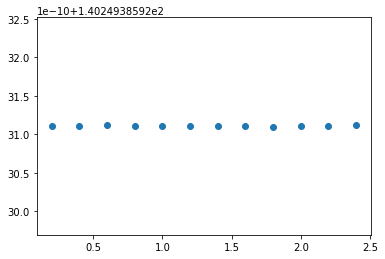

In [110]:
temp = np.arange(0.2, 2.5, 0.2)
GAM = []
for x in temp:
    with model:
        model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
        model.reactions.get_by_id('EX_glc__D_e').lower_bound = -x
        model.reactions.get_by_id('BIOMASS_RT').lower_bound = 0.0756654696*x
        model.objective = 'ATPM'
        sol = model.optimize()
        GAM.append(sol.objective_value/0.0756654696/x)
plt.scatter(temp,GAM)
print(np.mean(GAM), np.std(GAM))

[7.56654696e-02 1.28197512e-16]


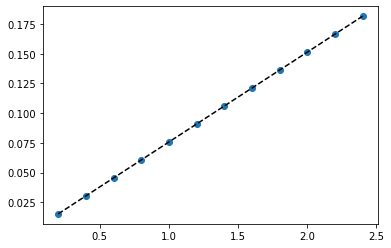

In [111]:
temp = np.arange(0.2, 2.5, 0.2)
y = []
GAM = round(np.mean(GAM), 6)
for x in temp:
    with model:
        model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
        model.reactions.get_by_id('EX_glc__D_e').lower_bound = -x
        model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': -GAM, 'h2o_c': -GAM,
                                                                 'adp_c': GAM, 'h_c': GAM, 'pi_c': GAM})
        sol = model.optimize()
        y.append(sol.objective_value)
fit = np.polyfit(temp,y,1)
print(fit)
plt.plot(temp, y, 'o', temp, np.poly1d(fit)(temp), '--k')

In [112]:
# Set NGAM and GAM to new values
model.reactions.get_by_id('ATPM').lower_bound = NGAM
model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': -GAM, 'h2o_c': -GAM,
                                                         'adp_c': GAM, 'h_c': GAM, 'pi_c': GAM})

In [113]:
sol = cobra.flux_analysis.pfba(model)
display(model.summary(sol))

In [114]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if not r.boundary and sum(abs(x) for x in r.check_mass_balance().values()) > 1e-12:
        print(r, r.gene_reaction_rule, r.check_mass_balance())

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 140.298633 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 136.32957199999998 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 p

In [115]:
print(len(model.genes))
print(len(model.reactions))
print(len(model.metabolites))
model

1152
2216
1968


Name,R. toruloides
Memory address,0x07fc99a3f8908
Number of metabolites,1968
Number of reactions,2216
Number of groups,0
Objective expression,1.0*BIOMASS_RT - 1.0*BIOMASS_RT_reverse_2b3e0
Compartments,"c, x, m, e, r, v, n, g, d, p"


In [116]:
for x in sorted(model.genes, key=lambda x: x.id):
    if not x.reactions:
        print(x)
print()
for x in sorted(model.metabolites, key=lambda x: x.id):
    if not x.reactions:
        print(x)

16129
ERG27
RTO3_874609
RTO3_879280
RTO3_879341
RTO3_879512
RTO3_900622
RTO3_900623
RTO3_900624
RTO3_900641
RTO3_900663
RTO3_945994
RTO3_945995
RTO3_946002
RTO3_946004
RTO3_946005
RTO3_979594

3hpcoa_c
4hbzcoa_m
T4hcinnm_m
T4hcinnm_p
bz12diol_c
coucoa_m
fer_p
pac_m
phaccoa_m
succoa_c


In [117]:
cobra.manipulation.remove_genes(model, [x for x in model.genes if not x.reactions])
model.remove_metabolites([x for x in model.metabolites if not x.reactions])

In [118]:
print(len(model.genes))
print(len(model.reactions))
print(len(model.metabolites))
print(len(set([m.id.rsplit('_',1)[0] for m in model.metabolites])))
print(len(model.compartments))
model

1135
2216
1958
1211
9


Name,R. toruloides
Memory address,0x07fc99a3f8908
Number of metabolites,1958
Number of reactions,2216
Number of groups,0
Objective expression,1.0*BIOMASS_RT - 1.0*BIOMASS_RT_reverse_2b3e0
Compartments,"c, x, m, e, r, v, n, g, d"


In [119]:
cobra.io.save_json_model(model, "IFO0880_GPR_2d.json")

In [120]:
model_old = cobra.io.load_json_model("IFO0880_GPR_2c.json")
model_new = cobra.io.load_json_model("IFO0880_GPR_2d.json")

In [121]:
print('Removed reactions\n')
for r in sorted(model_old.reactions, key=lambda x: x.id):
    if r not in model_new.reactions:
        print(r)

Removed reactions

3HPCOAHYD: 3hpcoa_c + h2o_c --> 3hpp_c + coa_c + h_c
3OACOAR: 3ohodcoa_c + h_c + nadph_c --> 3hodcoa_c + nadp_c
3OAR100: 3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + nadp_c
3OAR120: 3oddecACP_c + h_c + nadph_c <=> 3hddecACP_c + nadp_c
3OAR121: 3ocddec5eACP_c + h_c + nadph_c --> 3hcddec5eACP_c + nadp_c
3OAR140: 3omrsACP_c + h_c + nadph_c <=> 3hmrsACP_c + nadp_c
3OAR141: 3ocmrs7eACP_c + h_c + nadph_c --> 3hcmrs7eACP_c + nadp_c
3OAR160: 3opalmACP_c + h_c + nadph_c <=> 3hpalmACP_c + nadp_c
3OAR161: 3ocpalm9eACP_c + h_c + nadph_c --> 3hcpalm9eACP_c + nadp_c
3OAR180: 3ooctdACP_c + h_c + nadph_c <=> 3hoctaACP_c + nadp_c
3OAR181: 3ocvac11eACP_c + h_c + nadph_c --> 3hcvac11eACP_c + nadp_c
3OAR40: actACP_c + h_c + nadph_c <=> 3haACP_c + nadp_c
3OAR60: 3ohexACP_c + h_c + nadph_c <=> 3hhexACP_c + nadp_c
3OAR80: 3ooctACP_c + h_c + nadph_c <=> 3hoctACP_c + nadp_c
4HBHYOX: 4hbz_c + h_c + nadph_c + o2_c --> 34dhbz_c + h2o_c + nadp_c
COUCOAFm: T4hcinnm_m + atp_m + coa_m --> amp_m + co

In [122]:
print('Updated reactions\n')
for r in sorted(model_old.reactions, key=lambda x: x.id):
    if r in model_new.reactions:
        r2 = model_new.reactions.get_by_id(r.id)
        if (r.name == r2.name and r.reaction == r2.reaction and r.gene_reaction_rule == r2.gene_reaction_rule and
            r.lower_bound == r2.lower_bound and r.upper_bound == r2.upper_bound):
            pass
        else:
            print('Old', r, r.gene_reaction_rule)
            print('New', r2, r2.gene_reaction_rule)
            print()

Updated reactions

Old 4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11833 or 13700 or 14802 or 16129
New 4CMCOAS: T4hcinnm_c + atp_c + coa_c --> amp_c + coucoa_c + ppi_c 11167 or 15748

Old AACOATx: acac_x + atp_x + coa_x <=> aacoa_x + amp_x + ppi_x 15276
New AACOATx: acac_x + atp_x + coa_x --> aacoa_x + amp_x + ppi_x 15276

Old ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 11882 or 12784 or 9774
New ARABR: arab__L_c + h_c + nadph_c --> abt_c + nadp_c 9774

Old ATPS3m: adp_m + 3.0 h_c + pi_m --> atp_m + h2o_m + 2.0 h_m RTO3_879280 and RTO3_900623 and RTO3_900663 and 9080 and 9619 and 9940 and 10674 and 11958 and 11967 and 13053 and 13252 and 13424 and 13759 and 13842 and 14786 and 14912 and 15287 and 15589 and 15880 and 16359
New ATPS3m: adp_m + 3.0 h_c + pi_m --> atp_m + h2o_m + 2.0 h_m ATP6 and ATP8 and ATP9 and 9080 and 9619 and 9940 and 10674 and 11958 and 11967 and 13053 and 13252 and 13424 and 13759 and 13842 and 14786 and 14912 and 15287 and 15589 and 1

In [123]:
print('Added reactions\n')
for r in sorted(model_new.reactions, key=lambda x: x.id):
    if r not in model_old.reactions:
        print(r)

Added reactions

34DHBZACCOARp: 3dhp3hpcoa_x + nad_x --> 34dhbzaccoa_x + h_x + nadh_x
34DHBZACCOATp: 34dhbzaccoa_x + coa_x --> 34dhbzcoa_x + accoa_x
34DHBZCOAEp: 34dhbzcoa_x + h2o_x --> 34dhbz_x + coa_x + h_x
34DHBZtp: 34dhbz_c <=> 34dhbz_x
34DHCINMtp: 34dhcinm_c --> 34dhcinm_x
3HPCOAHYDm: 3hpcoa_m + h2o_m --> 3hpp_m + coa_m + h_m
3HPDm: 3hpp_m + nad_m --> h_m + msa_m + nadh_m
3OADPCOATm: 3oxoadp_m + succoa_m --> oxadpcoa_m + succ_m
3OXCOATm: coa_m + oxadpcoa_m --> accoa_m + succoa_m
3OXOADPTm: 3oxoadp_c + akg_m <=> 3oxoadp_m + akg_c
4CMLCL_kt: 4cml_c + h_c --> 5odhf2a_c + co2_c
4HBHYOXp: 4hbz_x + h_x + nadph_x + o2_x --> 34dhbz_x + h2o_x + nadp_x
4HBZACCOARp: 34hp3hpcoa_x + nad_x --> 4hbzaccoa_x + h_x + nadh_x
4HBZACCOATp: 4hbzaccoa_x + coa_x --> 4hbzcoa_x + accoa_x
4HBZCOAEp: 4hbzcoa_x + h2o_x --> 4hbz_x + coa_x + h_x
4HBZtm: 4hbz_c <=> 4hbz_m
4HBZtp: 4hbz_c <=> 4hbz_x
ABTD: abt_c + nad_c <=> h_c + nadh_c + xylu__L_c
ABT_Dt: abt__D_e <=> abt__D_c
ABTt: abt_e <=> abt_c
AKGtp: akg_c <=